# MaNGA H$\alpha$ Ring Galaxies Research (MPA)

## 导入各个package（各图的字体可能需要调整）

In [1]:
############ 导入各个package #############
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import astropy_mpl_style
from matplotlib import colors

## 导入数据
ring_fits是162个精选ring galaxies与MPA-JHU数据match之后的141个星系的信息，其中又包含133个星系具有GZ2数据；all_fits是MaNGA目前发布的4824个星系与MPA-JHU数据match之后的2480个星系的信息，其中包含2254个星系具有GZ2数据。
3月2日给数据里更新了galaxy zoo官网提供的bar strength数据，文章见[Hoyle, 2011](https://arxiv.org/abs/1104.5394).
3月8日给数据里更新了MPA-JHU提供的D4000等数据，详见https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/SDSS_indx.html.

In [2]:
############ 导入数据，ring_fits是162个精选ring galaxies与MPA-JHU数据match之后的141个星系的信息，其中又包含133个星系具有GZ2数据 #########
############ all_fits是MaNGA目前发布的4824个星系与MPA-JHU数据match之后的2480个星系的信息，其中包含2254个星系具有GZ2数据 ############ 
ring_fits=fits.open('2018-03-10-RING-Pipe3D-MPA-GZ-drpall.fits')
all_fits=fits.open('2018-03-10-ALL-Pipe3D-MPA-GZ-drpall.fits')

## 2755个MaNGA星系的SFR-MASS图和sSFR-MASS图
画有关mass的图的时候统一用了pipe3D中的**log_Mass**。现在有4个质量，分别是nsa_elpetro_mass, nsa_sersic_mass, MASS-AVG/MEDIAN/..., log_Mass(pipe3D).

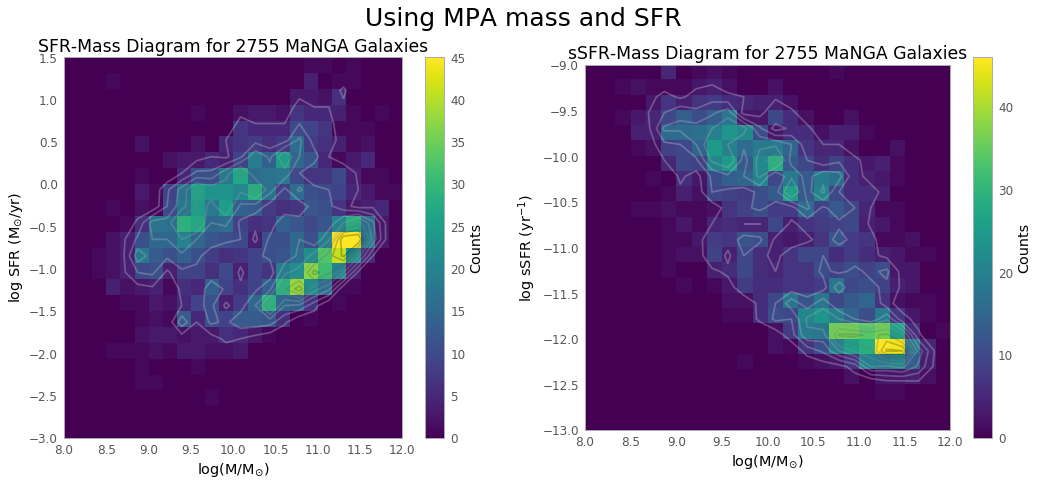

In [23]:
######################## 所有MaNGA星系的SFR-MASS 图 和 sSFR-MASS图 #########################
############ 注意：SFR用的是Pipe3D的数据 ############
tot_log_mass=all_fits[1].data['MASS-MEDIAN'] ## 注意：如果用MPA的MASS，则MASS-AVG经常是-1，要讨论一下用哪个质量合适. log_Mass是Pipe3D的。
tot_log_SFR=all_fits[1].data['SFR-MEDIAN']
valid_mask=np.logical_and(~np.isnan(tot_log_mass),tot_log_mass!=-1)

step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(tot_log_mass[valid_mask], tot_log_SFR[valid_mask], bins=(bins_for_mass, bins_for_SFR))
H_SFR = H_SFR.T

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
######################## SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
plt.imshow(H_SFR, interpolation='nearest',origin='low', cmap='viridis', 
           extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_SFR, 10,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='Greys', alpha=0.25)

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for 2755 MaNGA Galaxies')

######################## sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
H_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass[valid_mask], (tot_log_SFR-tot_log_mass)[valid_mask], 
                                                     bins=(bins_for_mass, bins_for_SSFR))
H_SSFR=H_SSFR.T
plt.imshow(H_SSFR, interpolation='nearest',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_SSFR,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap='Greys', alpha=0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for 2755 MaNGA Galaxies')

plt.suptitle('Using MPA mass and SFR',size=25)
#plt.savefig('tot_galaxy.png')
plt.show()

## 1786个Non-elliptical MaNGA星系的SFR-MASS图和sSFR-MASS图
画有关mass的图的时候统一用了pipe3D中的**log_Mass**。现在有4个质量，分别是nsa_elpetro_mass, nsa_sersic_mass, MASS-AVG/MEDIAN/..., log_Mass(pipe3D).

In [4]:
GZ1mask=~np.isnan(all_fits[1].data['SPIRAL']) ## GZ1mask为true的位置是有GZ1
disk_mask=(all_fits[1].data['SPIRAL']==1)
elliptical_mask=(all_fits[1].data['ELLIPTICAL']==1)
nelli_mask=np.logical_and((all_fits[1].data['ELLIPTICAL']!=1),(GZ1mask))
uncertain_mask=(all_fits[1].data['UNCERTAIN']==1)
print('disk mask total:', sum(disk_mask))
print('non-elliptical total:', sum(nelli_mask))
print('elliptical total:', sum(elliptical_mask))
print('GZ mask total:', sum(GZ1mask))

disk mask total: 786
non-elliptical total: 1786
elliptical total: 482
GZ mask total: 2268


In [5]:
rGZ1mask=~np.isnan(ring_fits[1].data['SPIRAL']) ## GZ1mask为true的位置是有GZ1
rdisk_mask=(ring_fits[1].data['SPIRAL']==1)
relliptical_mask=(ring_fits[1].data['ELLIPTICAL']==1)
rnelli_mask=np.logical_and((ring_fits[1].data['ELLIPTICAL']!=1),(rGZ1mask))
runcertain_mask=(ring_fits[1].data['UNCERTAIN']==1)
print('disk mask total:', sum(rdisk_mask))
print('non-elliptical total:', sum(rnelli_mask))
print('elliptical total:', sum(relliptical_mask))
print('GZ mask total:', sum(rGZ1mask))

disk mask total: 83
non-elliptical total: 122
elliptical total: 7
GZ mask total: 129


## Non-elliptical

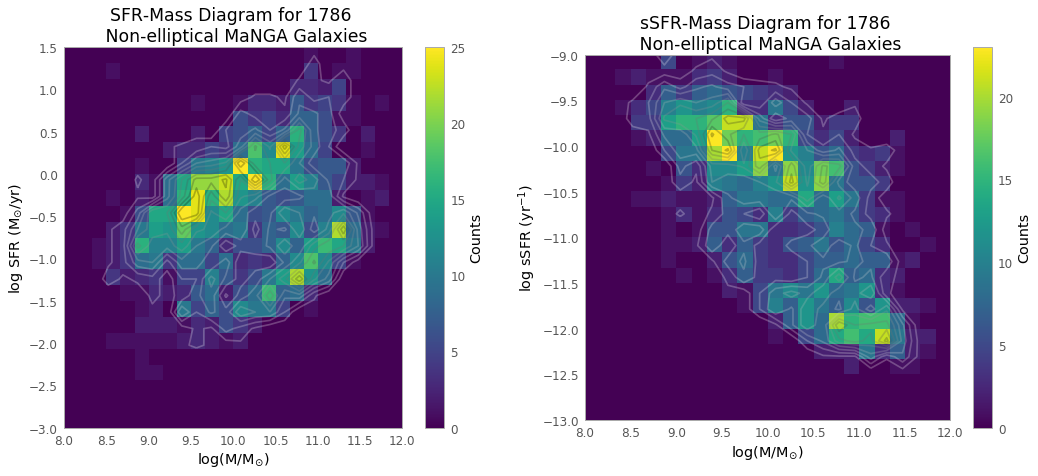

In [29]:
H_nelli_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[nelli_mask],tot_log_SFR[nelli_mask], 
                                                        bins=(bins_for_mass, bins_for_SFR))
H_nelli_SFR=H_nelli_SFR.T

H_nelli_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass[nelli_mask],(tot_log_SFR-tot_log_mass)[nelli_mask], 
                                                          bins=(bins_for_mass, bins_for_SSFR))
H_nelli_SSFR=H_nelli_SSFR.T

step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
######################## SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
plt.imshow(H_nelli_SFR, interpolation='nearest',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_nelli_SFR, 10, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='Greys', alpha=0.25)

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for 1786 \n Non-elliptical MaNGA Galaxies')

######################## sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
plt.imshow(H_nelli_SSFR, interpolation='nearest',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_nelli_SSFR,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap='Greys', alpha=0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for 1786 \n Non-elliptical MaNGA Galaxies')

plt.show()

## Disk

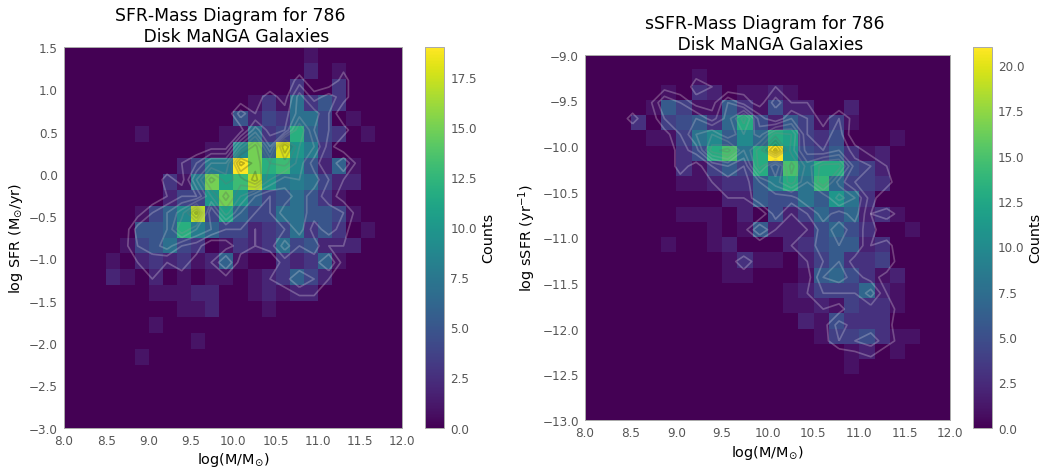

In [14]:
H_disk_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[disk_mask],tot_log_SFR[disk_mask], 
                                                        bins=(bins_for_mass, bins_for_SFR))
H_disk_SFR=H_disk_SFR.T

H_disk_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass[disk_mask],(tot_log_SFR-tot_log_mass)[disk_mask], 
                                                          bins=(bins_for_mass, bins_for_SSFR))
H_disk_SSFR=H_disk_SSFR.T

step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)
######################## SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
plt.imshow(H_disk_SFR, interpolation='nearest',origin='low', cmap='viridis', 
           extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_disk_SFR, 10, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], cmap='Greys', alpha=0.25)

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.title('SFR-Mass Diagram for 786 \n Disk MaNGA Galaxies')

######################## sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
plt.imshow(H_disk_SSFR, interpolation='nearest',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Counts')
plt.contour(H_disk_SSFR,10,extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap='Greys', alpha=0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for 786 \n Disk MaNGA Galaxies')

plt.show()

### Quanlity Control: Pipe3D做出来的这个mass到底靠不靠谱？显然用Pipe3D的mass和SFR更加像这个图：
![image](http://www.sdss.org/wp-content/uploads/2017/05/sSFR_images_gas.png)

### MaNGA官网上只给了一个mass的quality control的图，但是没给pipeline 3D与MPA SFR的quality control图。下面是这两个图，关键是不知道MPA的SFR更靠谱还是pipeline3D更靠谱。
![image](http://www.sdss.org/wp-content/uploads/2017/05/Mass_comp.png)

### 下图是Pipe3D_mass和sersic_mass的关系，可以看出sersic_mass比pipe3D的小一些。下面也画了pipe3d的SFR和MPA-SFR-P84，可以看出也有些不同。还是不知道用哪个好。

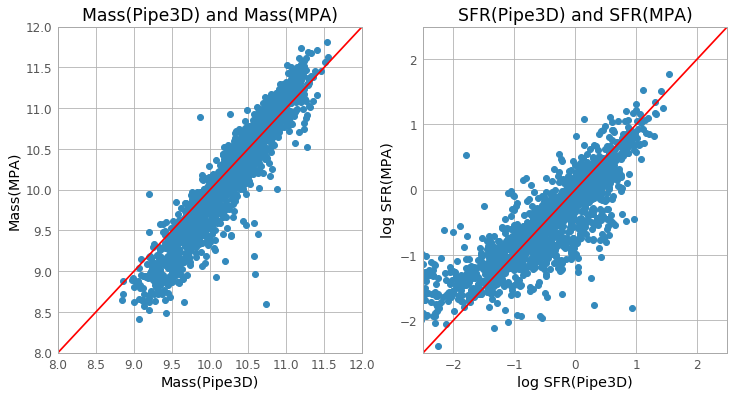

In [8]:
plt.figure(figsize=(12,6))
ax1=plt.subplot2grid((1,2),(0,0))
#plt.scatter(all_fits[1].data['log_Mass'],np.log10(all_fits[1].data['nsa_sersic_mass']))
err=all_fits[1].data['e_log_Mass']
plt.scatter(all_fits[1].data['log_Mass'][nelli_mask],all_fits[1].data['MASS-MEDIAN'][nelli_mask])
x=np.linspace(8,12,100)
plt.plot(x,x,'r')
plt.xlabel('Mass(Pipe3D)')
plt.ylabel('Mass(MPA)')
plt.xlim(8,12)
plt.ylim(8,12)
plt.title('Mass(Pipe3D) and Mass(MPA)')


ax2=plt.subplot2grid((1,2),(0,1))
err=all_fits[1].data['e_log_sfr_ha']
#plt.scatter(all_fits[1].data['log_SFR_Ha'],all_fits[1].data['SFR-AVG'],marker=(5,1,0),s=500, facecolors='none', edgecolors='r')
plt.scatter(all_fits[1].data['log_SFR_Ha'][nelli_mask],all_fits[1].data['SFR-MEDIAN'][nelli_mask])
x=np.linspace(-2.5,2.5,100)
plt.plot(x,x,'r')
plt.xlabel('log SFR(Pipe3D)')
plt.ylabel('log SFR(MPA)')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('SFR(Pipe3D) and SFR(MPA)')
plt.show()

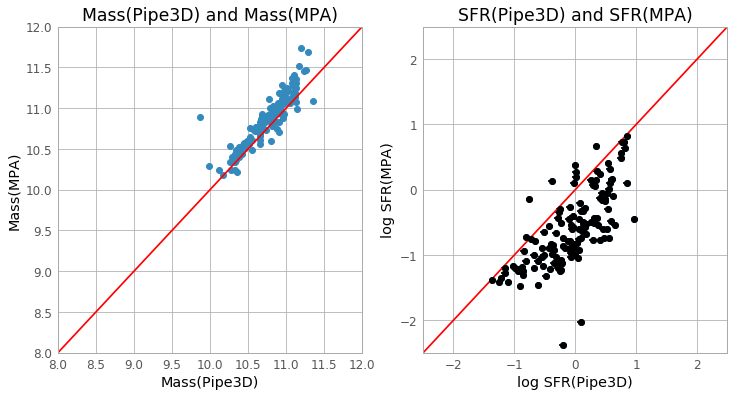

In [9]:
plt.figure(figsize=(12,6))
ax1=plt.subplot2grid((1,2),(0,0))
#plt.scatter(all_fits[1].data['log_Mass'],np.log10(all_fits[1].data['nsa_sersic_mass']))
plt.scatter(ring_fits[1].data['log_Mass'],ring_fits[1].data['MASS-MEDIAN'])
x=np.linspace(8,12,100)
plt.plot(x,x,'r')
plt.xlabel('Mass(Pipe3D)')
plt.ylabel('Mass(MPA)')
plt.xlim(8,12)
plt.ylim(8,12)
plt.title('Mass(Pipe3D) and Mass(MPA)')


ax2=plt.subplot2grid((1,2),(0,1))
err=ring_fits[1].data['e_log_sfr_ha']
#plt.scatter(all_fits[1].data['log_SFR_Ha'],all_fits[1].data['SFR-AVG'],marker=(5,1,0),s=500, facecolors='none', edgecolors='r')
plt.scatter(ring_fits[1].data['log_SFR_Ha'],ring_fits[1].data['SFR-MEDIAN'] )
plt.errorbar(ring_fits[1].data['log_SFR_Ha'],ring_fits[1].data['SFR-MEDIAN'], xerr=err, fmt='ko')
x=np.linspace(-2.5,2.5,100)
plt.plot(x,x,'r')
plt.xlabel('log SFR(Pipe3D)')
plt.ylabel('log SFR(MPA)')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('SFR(Pipe3D) and SFR(MPA)')
plt.show()

## Ring Galaxies的SFR-MASS图和sSFR-MASS图，需要注意这个图里用的mass，SFR，sSFR都是pipe3D的结果，画出来的图与MPA-JHU的结果存在较大差异。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


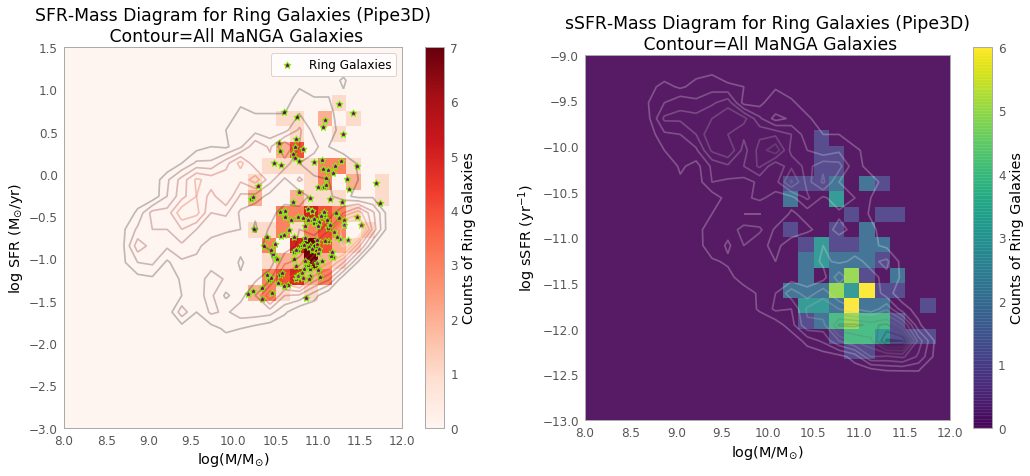

In [26]:
ring_log_mass = ring_fits[1].data['MASS-MEDIAN'] # 来自pipe3D
ring_log_SFR  = ring_fits[1].data['SFR-MEDIAN']# 来自pipe3D
ring_log_SSFR  = ring_fits[1].data['SSFR-MEDIAN']# 来自pipe3D

step = 25 # bin之后一个边长的格子数
bins_for_SFR  = np.linspace(-3,1.5,step)
bins_for_SSFR = np.linspace(-13,-9,step)
bins_for_mass = np.linspace(8,12,step)

fig = plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)

######################## 画ring的SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
H_ring_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H_ring_SFR = H_ring_SFR.T
plt.imshow(H_ring_SFR, interpolation = 'nearest',origin = 'low', cmap = 'Reds', 
           extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label = 'Counts of Ring Galaxies')
plt.contour(H_SFR, 10, extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], alpha = 0.25)
plt.scatter(ring_log_mass, ring_log_SFR, s=50, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Ring Galaxies')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.xlim(8,12)
plt.legend()
plt.title('SFR-Mass Diagram for Ring Galaxies (Pipe3D)\n Contour=All MaNGA Galaxies')

######################## 画ring的sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
H_ring_SSFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR-ring_log_mass, 
                                                          bins = (bins_for_mass, bins_for_SSFR))
H_ring_SSFR = H_ring_SSFR.T

plt.imshow(H_ring_SSFR, interpolation = 'nearest',origin = 'low', cmap = 'viridis', 
           extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]],alpha = 0.9)
plt.colorbar(label='Counts of Ring Galaxies')
plt.contour(H_SSFR,10,extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap = 'Greys', alpha = 0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for Ring Galaxies (Pipe3D)\n Contour=All MaNGA Galaxies')
plt.legend()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


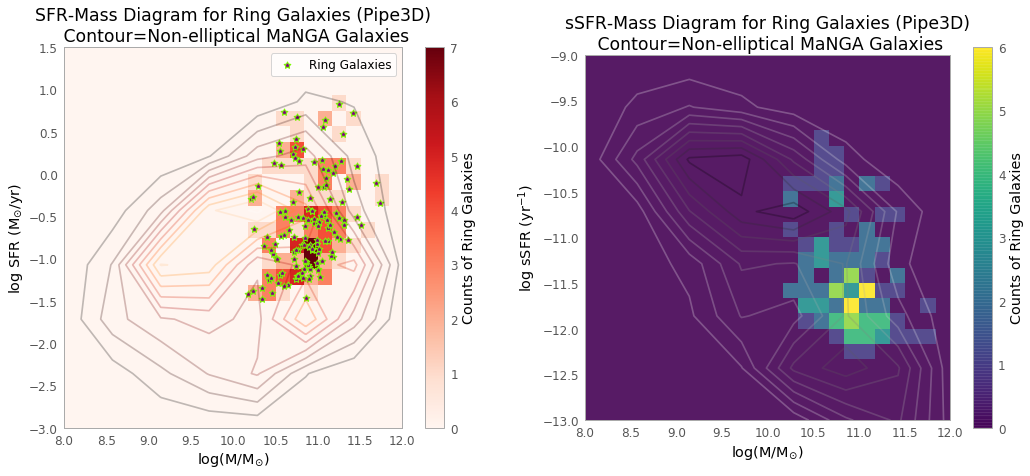

In [16]:
step = 25 # bin之后一个边长的格子数
bins_for_SFR  = np.linspace(-3,1.5,step)
bins_for_SSFR = np.linspace(-13,-9,step)
bins_for_mass = np.linspace(8,12,step)

fig = plt.figure(figsize=(18,7))
plt.style.use(astropy_mpl_style)

######################## 画ring的SFR图 #########################
ax1 = plt.subplot2grid((1,2), (0,0)) 
H_ring_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H_ring_SFR = H_ring_SFR.T
plt.imshow(H_ring_SFR, interpolation = 'nearest',origin = 'low', cmap = 'Reds', 
           extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label = 'Counts of Ring Galaxies')
plt.contour(H_nelli_SFR, 10, extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], alpha = 0.25)
plt.scatter(ring_log_mass, ring_log_SFR, s=50, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Ring Galaxies')
plt.xlim(8,12)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.grid('off')
plt.legend()
plt.title('SFR-Mass Diagram for Ring Galaxies (Pipe3D)\n Contour=Non-elliptical MaNGA Galaxies')

######################## 画ring的sSFR图 #########################
ax2 = plt.subplot2grid((1,2),(0,1))
H_ring_SSFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR-ring_log_mass, 
                                                          bins = (bins_for_mass, bins_for_SSFR))
H_ring_SSFR = H_ring_SSFR.T

plt.imshow(H_ring_SSFR, interpolation = 'nearest',origin = 'low', cmap = 'viridis', 
           extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]],alpha = 0.9)
plt.colorbar(label='Counts of Ring Galaxies')
plt.contour(H_nelli_SSFR,10,extent = [bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], cmap = 'Greys', alpha = 0.25)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.grid('off')
plt.title('sSFR-Mass Diagram for Ring Galaxies (Pipe3D)\n Contour=Non-elliptical MaNGA Galaxies')
plt.legend()

plt.show()

# BPT部分
## BPT DIAGRAM
### 通过下面这个BPT diagram，可以看出大多数ring galaxies都是LINER AGN。下图AGN的内容基本都用的是MPA-JHU数据库。注意：直接用MPA的EQW对于H$\alpha$是不行的，Note that it will not be correct in the case of blended lines (ie NII & H-alpha)  -- instead use FLUX/CONT.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3

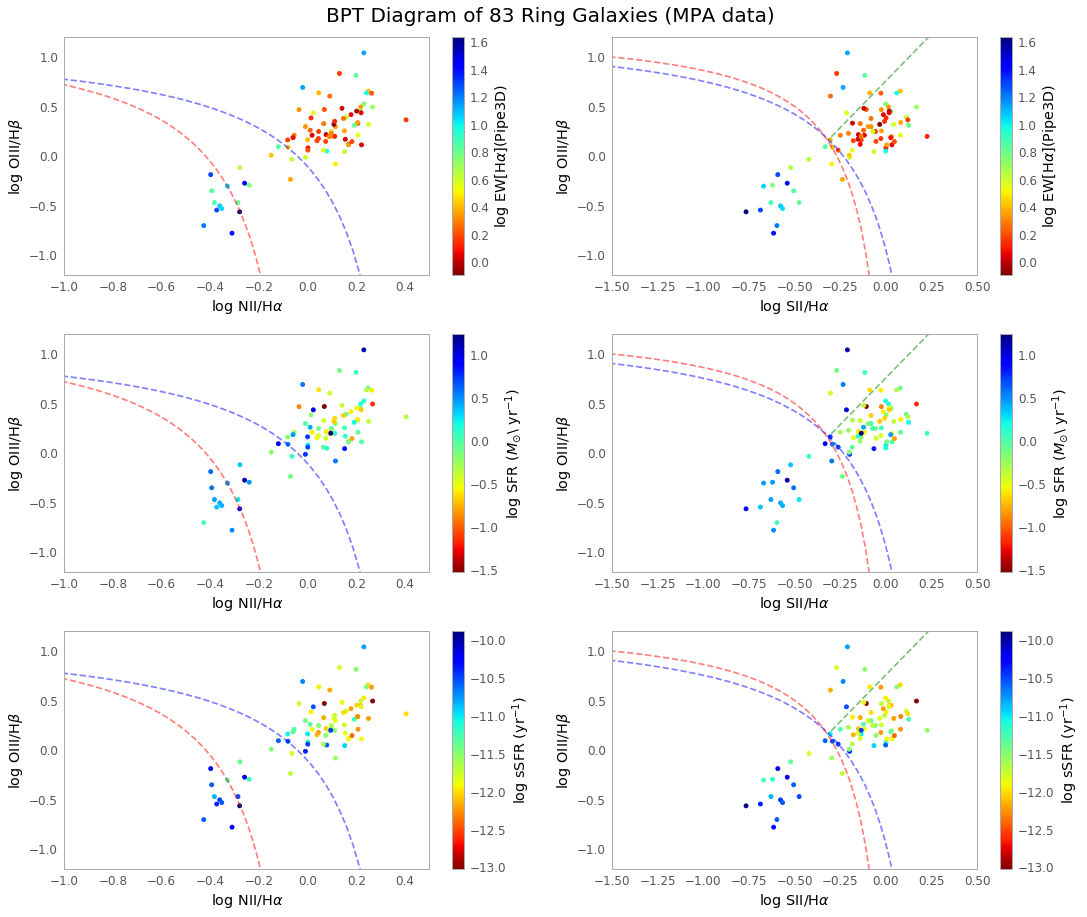

In [17]:
############  141个精选ring galaxies的BPT DIAGRAM （中心3角秒） ################

############  信噪比S/N大于3/√2 的星系才能入选BPT diagram，SN mask为true的即为入选星系  ###############
Lsii_6717=ring_fits[1].data['SII_6717_flux']
Lsii_6731=ring_fits[1].data['SII_6731_flux']
Lsii=Lsii_6717+Lsii_6731    ## 注意：BPT diagram要求将6717和6731谱线相加
err_Lsii=ring_fits[1].data['SII_6717_flux_err']*1.621
SN_sii_6717=Lsii_6717/err_Lsii
SN_sii_6731=Lsii_6731/err_Lsii

Lha=ring_fits[1].data['H_alpha_flux']
err_Lha=ring_fits[1].data['H_alpha_flux_err']*2.473
SN_ha=Lha/err_Lha

Lhb=ring_fits[1].data['H_beta_flux']
err_Lhb=ring_fits[1].data['H_beta_flux_err']*1.882
SN_hb=Lhb/err_Lhb

Loiii=ring_fits[1].data['OIII_5007_flux']
err_Loiii=ring_fits[1].data['OIII_5007_flux_err']*1.566
SN_oiii=Loiii/err_Loiii

Lnii=ring_fits[1].data['NII_6584_flux']
err_Lnii=ring_fits[1].data['NII_6584_flux_err']*2.039
SN_nii=Lnii/err_Lnii

log_SFR=ring_fits[1].data['log_SFR_Ha']

log_ew_ha=np.log10(ring_fits[1].data['H_ALPHA_FLUX']/ring_fits[1].data['H_ALPHA_CONT'])

b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii_6717>b,SN_sii_6731>b),SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

############### 绘制 BPT diagram ###############

fig=plt.figure(figsize=(18,14))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((3,2), (0,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=log_ew_ha[SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ EW[H$\alpha$](Pipe3D)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
#plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((3,2),(0,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=log_ew_ha[SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ EW[H$\alpha$](Pipe3D)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

ax3=plt.subplot2grid((3,2),(1,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ring_fits[1].data['SFR-P84'][SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ SFR ($M_{\odot}$\ yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')

ax4=plt.subplot2grid((3,2),(1,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ring_fits[1].data['SFR-P84'][SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ SFR ($M_{\odot}$\ yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

ax5=plt.subplot2grid((3,2),(2,0))
plt.scatter(np.log10(Lnii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ring_fits[1].data['SSFR-AVG'][SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ sSFR (yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')

ax6=plt.subplot2grid((3,2),(2,1))
plt.scatter(np.log10(Lsii/Lha)[SNmask],np.log10(Loiii/Lhb)[SNmask],c=ring_fits[1].data['SSFR-AVG'][SNmask], s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ sSFR (yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of 83 Ring Galaxies (MPA data)', size=20)
plt.subplots_adjust(top=0.95,hspace=0.25, wspace=0.2)
#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

### 注意：MPA给出的中央3"的EW_HA与Pipe3D给出的中央2.5"的EW_HA相差很大，见下图。
> Note that it will not be correct in the case of blended lines (ie NII & H-alpha)  -- instead use FLUX/CONT.

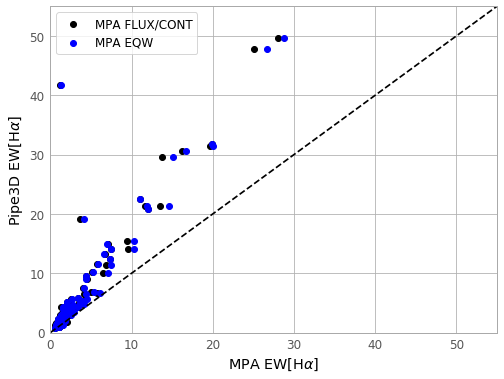

In [13]:
plt.scatter(ring_fits[1].data['H_ALPHA_FLUX']/ring_fits[1].data['H_ALPHA_CONT']
    ,np.abs(ring_fits[1].data['EW_HA_CEN']),color='k', label='MPA FLUX/CONT')
plt.scatter(np.abs(ring_fits[1].data['H_ALPHA_EQW'])
    ,np.abs(ring_fits[1].data['EW_HA_CEN']),color='b', label='MPA EQW')
plt.xlim(0,55)
plt.ylim(0,55)
x=np.linspace(0,55,10)
plt.plot(x,x,'k--')
plt.xlabel(r'MPA EW[H$\alpha$]')
plt.ylabel(r'Pipe3D EW[H$\alpha$]')
plt.legend()
plt.show()

### 用Pipe3D的数据画一下BPT diagram，数据主要来源是[manga.Pipe3D-v2_1_2.fits](https://data.sdss.org/sas/dr14/manga/spectro/pipe3d/v2_1_2/2.1.2/manga.Pipe3D-v2_1_2.fits)。这个catalogue已经提供好了NII/H$\alpha$等等。但是需要筛选SNR大于一定值的星系。fits里给了log_NII_Ha的error，该定什么样的标准？

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in true_divide


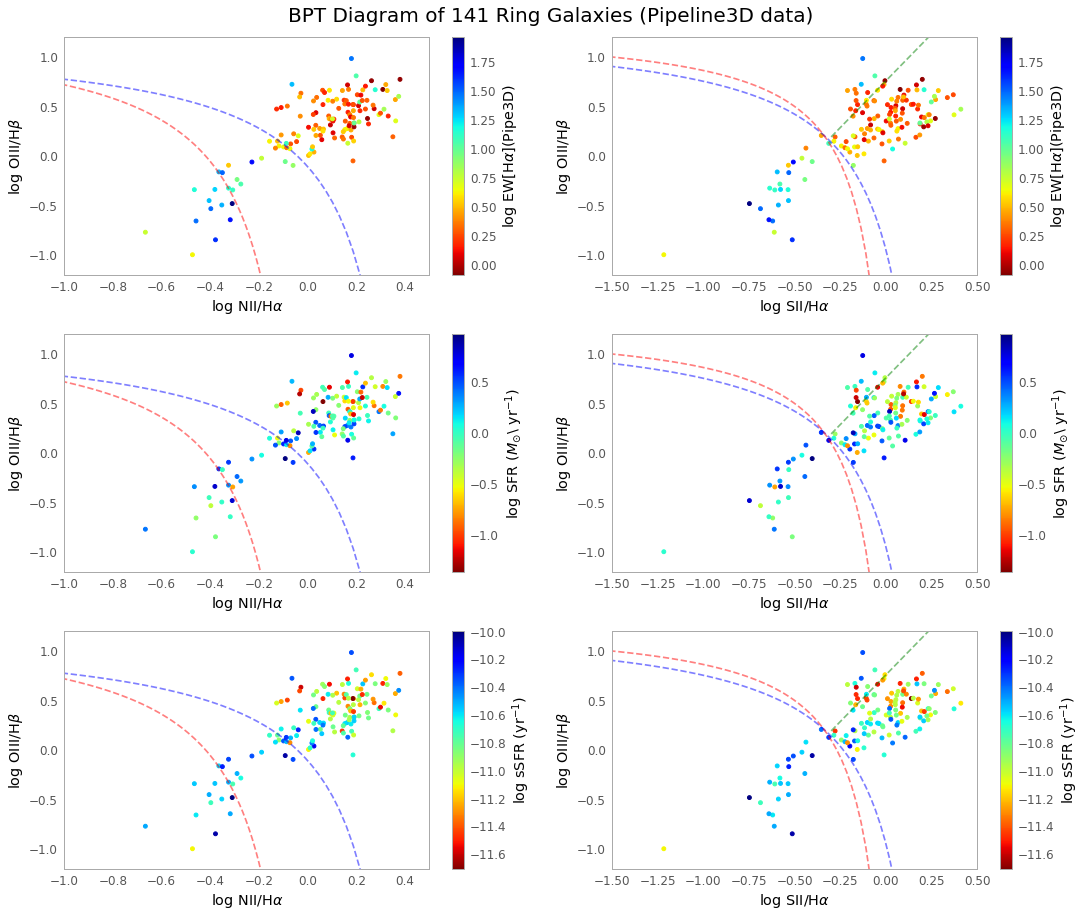

In [14]:
############  141个精选ring galaxies的BPT DIAGRAM （中心2.5角秒）PIPELINE3D ################
############### 下面这个是用来筛选SNR ################
#SN_NII_Ha   = ring_fits[1].data['log_NII_Ha_cen']-ring_fits[1].data['e_log_NII_Ha_cen']
#SN_OIII_Hb  = ring_fits[1].data['log_OIII_Hb_cen']-ring_fits[1].data['e_log_OIII_Hb_cen']
#SN_SII_Ha   = ring_fits[1].data['log_SII_Ha_cen']-ring_fits[1].data['e_log_SII_Ha_cen']
NII_Ha      = ring_fits[1].data['log_NII_Ha_cen']
OIII_Hb     = ring_fits[1].data['log_OIII_Hb_cen']
SII_Ha      = ring_fits[1].data['log_SII_Ha_cen']
#b           = np.log10(3/np.sqrt(2))
#PP3D_SNmask = np.logical_and(np.logical_and(SN_NII_Ha>b,SN_OIII_Hb>b),SN_SII_Ha>b)
log_ew_ha=np.log10(-ring_fits[1].data['EW_HA_CEN'])  # # 原始数据说：We follow the convention in which the EW of an emission line is negative and an absorption line is positive
ring_log_mass = ring_fits[1].data['log_Mass'] # 来自pipe3D
ring_log_SFR  = ring_fits[1].data['log_SFR_Ha'] # 来自pipe3D
############### 绘制 BPT diagram ###############

fig = plt.figure(figsize=(18,14))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((3,2), (0,0))
plt.scatter(NII_Ha, OIII_Hb, c = log_ew_ha, s=15, marker='o', cmap='jet_r')
x  = np.linspace(-1.28,0.04,100)
y1 = 0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x  = np.linspace(-2.5,0.3,100)
y2 = 0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ EW[H$\alpha$](Pipe3D)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')

ax2=plt.subplot2grid((3,2),(0,1))
plt.scatter(SII_Ha, OIII_Hb,c = log_ew_ha, s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ EW[H$\alpha$](Pipe3D)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

ax3 = plt.subplot2grid((3,2), (1,0))
plt.scatter(NII_Ha, OIII_Hb, c = ring_log_SFR, s=15, marker='o', cmap='jet_r')
x  = np.linspace(-1.28,0.04,100)
y1 = 0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x  = np.linspace(-2.5,0.3,100)
y2 = 0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ SFR ($M_{\odot}$\ yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')

ax4=plt.subplot2grid((3,2),(1,1))
plt.scatter(SII_Ha, OIII_Hb,c = ring_log_SFR, s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ SFR ($M_{\odot}$\ yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

ax5 = plt.subplot2grid((3,2), (2,0))
plt.scatter(NII_Ha, OIII_Hb, c = ring_log_SFR-ring_log_mass, s=15, marker='o', cmap='jet_r')
x  = np.linspace(-1.28,0.04,100)
y1 = 0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x  = np.linspace(-2.5,0.3,100)
y2 = 0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ sSFR (yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')

ax6=plt.subplot2grid((3,2),(2,1))
plt.scatter(SII_Ha, OIII_Hb,c = ring_log_SFR-ring_log_mass, s=15, marker='o', cmap='jet_r')
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'$\log$ sSFR (yr$^{-1}$)')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of 141 Ring Galaxies (Pipeline3D data)', size=20)
plt.subplots_adjust(top=0.95,hspace=0.25, wspace=0.2)
#plt.savefig('BPT for ring galaxies.png',dpi=600)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


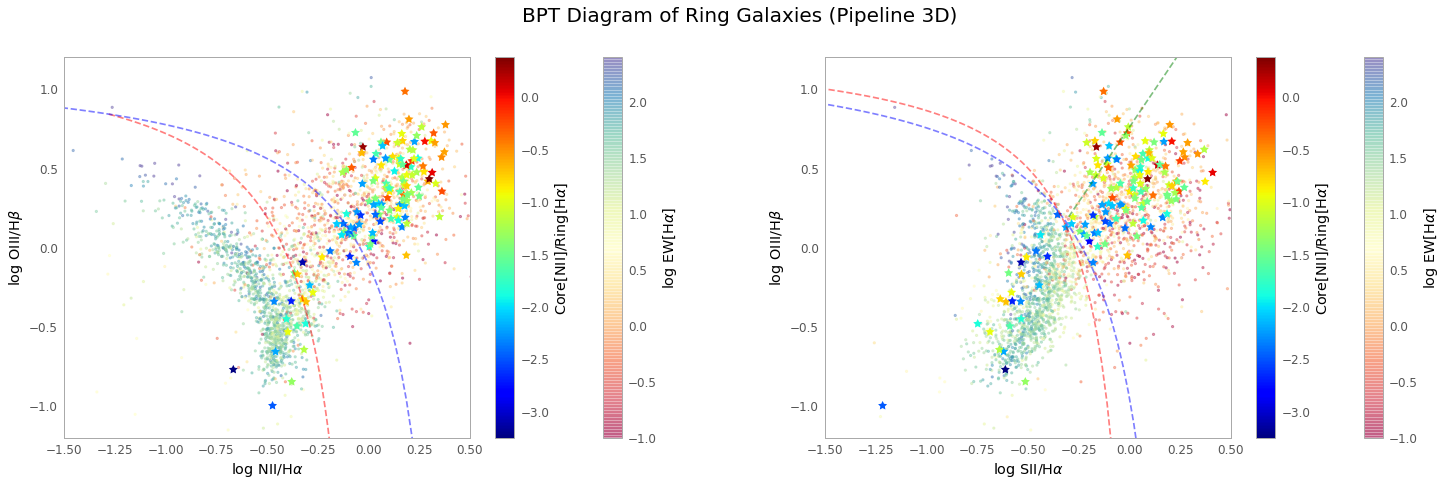

In [18]:
############  141个精选ring galaxies的BPT DIAGRAM （中心2.5角秒） ################

from matplotlib import colors

############### 绘制 BPT diagram ###############
tot_ew_ha=-all_fits[1].data['ew_ha_cen']
ring_ew_ha=-ring_fits[1].data['ew_ha_cen']
ring_Lha=ring_fits[1].data['ring_Lha']
core_Lnii=ring_fits[1].data['core_Lnii']


fig=plt.figure(figsize=(25,7))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
norm=colors.Normalize(vmin=-1,vmax=2.4)
plt.scatter(all_fits[1].data['log_NII_Ha_cen'],all_fits[1].data['log_OIII_Hb_cen'],
            c=np.log10(tot_ew_ha),norm=norm, s=5, marker='o', cmap='Spectral', alpha=0.4)
x=np.linspace(-1.28,0.04,100)
y1=0.61/(x-0.05)+1.30
plt.plot(x,y1,'r--',alpha=0.5)
x=np.linspace(-2.5,0.3,100)
y2=0.61/(x-0.47)+1.19
plt.plot(x,y2,'b--',alpha=0.5)
#plt.gray()
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log EW[H$\alpha$]')

plt.scatter(ring_fits[1].data['log_NII_Ha_cen'], ring_fits[1].data['log_OIII_Hb_cen'],s=90, 
            marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='jet', facecolors='none', edgecolors='none')
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')
plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ NII/H$\alpha$')
plt.grid('off')
#plt.ylabel(r'$\log$(EW(NII)$_{core}$/EW(H$\alpha$)$_{core}$)')
#plt.title(r'BPT Diagram for Ring Galaxies')

ax2=plt.subplot2grid((1,2),(0,1))
norm=colors.Normalize(vmin=-1,vmax=2.4)
plt.scatter(all_fits[1].data['log_SII_Ha_cen'],all_fits[1].data['log_OIII_Hb_cen'],
            c=np.log10(tot_ew_ha),norm=norm, s=5, marker='o', cmap='Spectral', alpha=0.4)
x=np.linspace(-0.3,0.5,100)
y1=1.89*x+0.76
plt.plot(x,y1,'g--',alpha=0.5)
x=np.linspace(-2.5,0.1,100)
y2=0.72/(x-0.32)+1.30
y3=0.48/(x-0.10)+1.30
plt.plot(x,y2,'b--',alpha=0.5)
plt.plot(x,y3,'r--',alpha=0.5)
plt.xlim(-1.5,0.5)
plt.ylim(-1.2,1.2)
plt.colorbar(label=r'log EW[H$\alpha$]')
#plt.scatter(all_fits[1].data['log_NII_Ha_cen'][BARLENmask], all_fits[1].data['log_OIII_Hb_cen'][BARLENmask],s=90, 
#            marker=(5,1,0),c=bar_length_scaled[BARLENmask], cmap='Blues', facecolors='none', edgecolors='none')
plt.scatter(ring_fits[1].data['log_SII_Ha_cen'], ring_fits[1].data['log_OIII_Hb_cen'],s=90, 
            marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='jet', facecolors='none', edgecolors='none')
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')

plt.ylabel(r'$\log$ OIII/H$\beta$')
plt.xlabel(r'$\log$ SII/H$\alpha$')
plt.grid('off')

plt.suptitle(r'BPT Diagram of Ring Galaxies (Pipeline 3D)', size=20)
#plt.savefig('BPT for ring galaxies.pdf',dpi=600)
plt.show()

### 下面根据MPA的数据判断galaxy center的类型

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered 

AGN1 number is 118
SF1 number is 9
Composite number is 14
Total number is 141

SF2 number is 34
LINER number is 85
AGN2 number is 21
Total number is 140



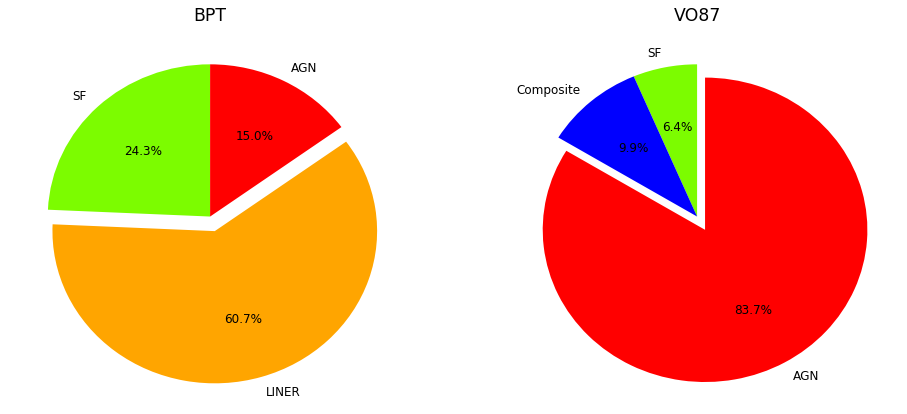

In [20]:
############### 判断星系的类型，从两个图中分别判断 MPA ###############
############### 判断星系的类型，从两个图中分别判断 PIPELINE3D ###############
y=np.log10(Loiii/Lhb)
x=np.log10(Lnii/Lha)
#SF1=np.logical_and(np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
SF1 = np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#Composite=np.logical_and(np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
Composite = np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#AGN1=np.logical_xor(np.logical_xor(SF1,SNmask),Composite)
AGN1=np.logical_xor(np.logical_xor(SF1,np.linspace(1,1,141)),Composite)
print("AGN1 number is %d" % sum(AGN1))
print("SF1 number is %d" % sum(SF1))
print("Composite number is %d" % sum(Composite))
print("Total number is %d" % sum(AGN1+SF1+Composite))
print('')

y=np.log10(Loiii/Lhb)
x=np.log10(Lsii/Lha)
SF2=np.logical_and(y<0.48/(x-0.10)+1.30,x<=0.1)
LINER=np.logical_and(np.logical_xor(SF2,np.linspace(1,1,141)),y<=1.89*x+0.76)
AGN2=np.logical_and(np.logical_xor(SF2,np.linspace(1,1,141)),y>1.89*x+0.76)
print("SF2 number is %d" % np.sum(SF2))
print("LINER number is %d" % np.sum(LINER))
print("AGN2 number is %d" % np.sum(AGN2))
print("Total number is %d" % sum(AGN2+SF2+LINER))
print('')

fig=plt.figure(figsize=(16,7))
plt.style.use(astropy_mpl_style)
############## 画图1 ###################
ax1=plt.subplot2grid((1,2),(0,0))
labels = 'SF','LINER','AGN'
sizes = [sum(SF2),sum(LINER), sum(AGN2)]
explode = (0,0.1,0) #0.1表示将Hogs那一块凸显出来
colors='lawngreen', 'orange', 'red'
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90, colors=colors)
plt.title('BPT')
############## 画图2 ###################
ax2=plt.subplot2grid((1,2),(0,1))
labels = 'SF','Composite','AGN'
sizes = [sum(SF1),sum(Composite),sum(AGN1)]
explode = (0,0,0.1) #0.1表示将Hogs那一块凸显出来
colors='lawngreen', 'blue', 'red'
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90, colors=colors)
plt.title('VO87')
plt.show()

## Ring Galaxies在整个MaNGA样本中的分布情况（运行这个之前必须先运行后面画BPT diagram 的部分）
彭老师建议ratio是ring galaxies在一个square中占disk galaxies的比例，因此要除去elliptical galaxies，这里用GZ1来实现。
现在的问题是，如果用MPA的SFR-AVG数据，那么ring galaxies的SFR明显偏小。所以现在的问题是：用哪个SFR。我现在用[Pipe3D](https://data.sdss.org/datamodel/files/MANGA_PIPE3D/MANGADRP_VER/PIPE3D_VER/manga.Pipe3D.html)给出的mass和SFR画的图。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


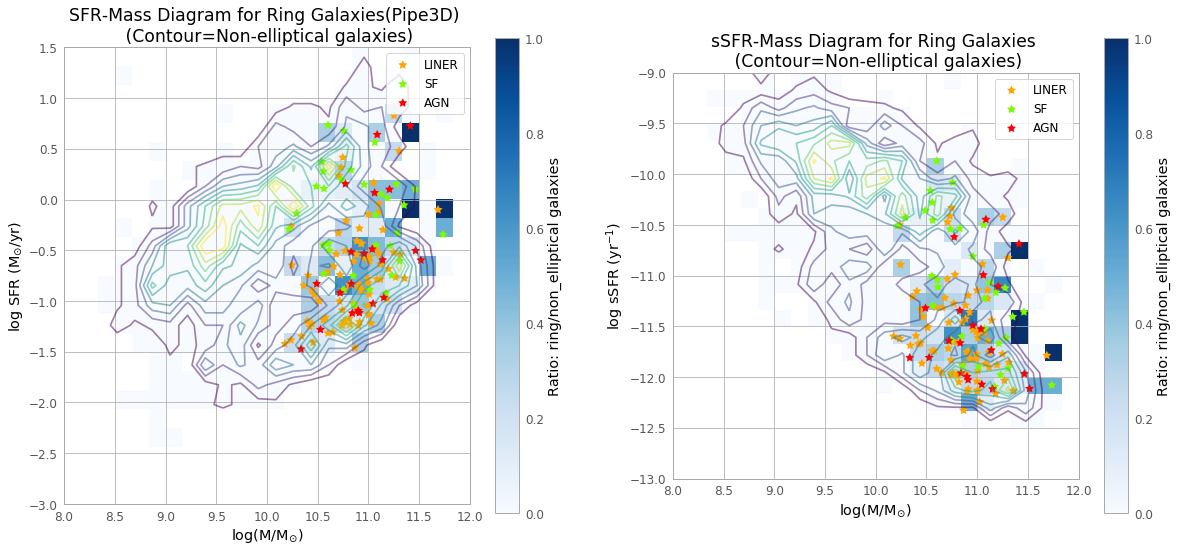

In [30]:
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(20,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(ring_log_mass[LINER],ring_log_SFR[LINER], label='LINER', s=90, 
            marker=(5,1,0), facecolors='orange', edgecolors='none')
plt.scatter(ring_log_mass[SF2],ring_log_SFR[SF2], label='SF',s=90, 
            marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[AGN2],ring_log_SFR[AGN2], label='AGN',s=90, 
            marker=(5,1,0), facecolors='r', edgecolors='none')
plt.contour(H_nelli_SFR,10,cmap='viridis',
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], alpha=0.5)
plt.imshow(H_ring_SFR/H_nelli_SFR,interpolation='nearest', origin='low', cmap='Blues', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
#norm=colors.Normalize(vmin=0, vmax=30)
plt.colorbar(label='Ratio: ring/non_elliptical galaxies')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('SFR-Mass Diagram for Ring Galaxies(Pipe3D) \n (Contour=Non-elliptical galaxies)')
plt.legend()
plt.grid('on')


ax2 = plt.subplot2grid((1,2), (0,1))

plt.scatter(ring_log_mass[LINER],(ring_log_SFR-ring_log_mass)[LINER], label='LINER', s=90, 
            marker=(5,1,0), facecolors='orange', edgecolors='none')
plt.scatter(ring_log_mass[SF2],(ring_log_SFR-ring_log_mass)[SF2], label='SF',s=90, 
            marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[AGN2],(ring_log_SFR-ring_log_mass)[AGN2], label='AGN',s=90, 
            marker=(5,1,0), facecolors='r', edgecolors='none')
plt.contour(H_nelli_SSFR,10,cmap='viridis',
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], alpha=0.5)
plt.imshow(H_ring_SSFR/H_nelli_SSFR,interpolation='nearest', origin='low', cmap='Blues', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: ring/non_elliptical galaxies')

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('sSFR-Mass Diagram for Ring Galaxies \n (Contour=Non-elliptical galaxies)')

plt.legend()
plt.grid('on')

plt.subplots_adjust(top=0.95,hspace=0.25, wspace=0.2)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


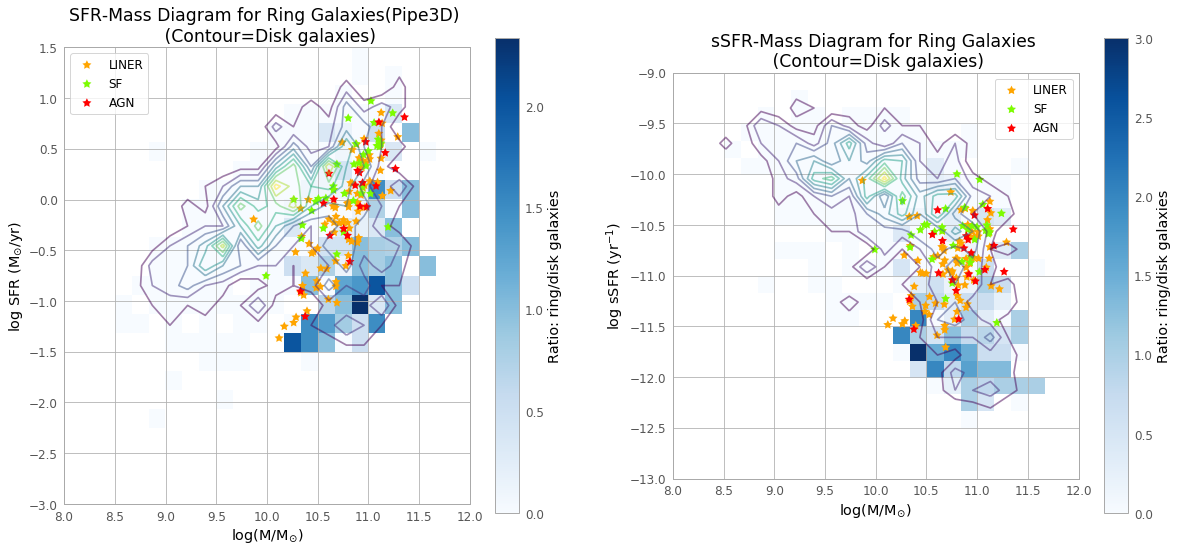

In [18]:
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(20,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.scatter(ring_log_mass[LINER],ring_log_SFR[LINER], label='LINER', s=90, 
            marker=(5,1,0), facecolors='orange', edgecolors='none')
plt.scatter(ring_log_mass[SF2],ring_log_SFR[SF2], label='SF',s=90, 
            marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[AGN2],ring_log_SFR[AGN2], label='AGN',s=90, 
            marker=(5,1,0), facecolors='r', edgecolors='none')
plt.contour(H_disk_SFR,10,cmap='viridis',
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], alpha=0.5)
plt.imshow(H_ring_SFR/H_disk_SFR,interpolation='nearest', origin='low', cmap='Blues', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
#norm=colors.Normalize(vmin=0, vmax=30)
plt.colorbar(label='Ratio: ring/disk galaxies')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('SFR-Mass Diagram for Ring Galaxies(Pipe3D) \n (Contour=Disk galaxies)')
plt.legend()
plt.grid('on')


ax2 = plt.subplot2grid((1,2), (0,1))

plt.scatter(ring_log_mass[LINER],(ring_log_SFR-ring_log_mass)[LINER], label='LINER', s=90, 
            marker=(5,1,0), facecolors='orange', edgecolors='none')
plt.scatter(ring_log_mass[SF2],(ring_log_SFR-ring_log_mass)[SF2], label='SF',s=90, 
            marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[AGN2],(ring_log_SFR-ring_log_mass)[AGN2], label='AGN',s=90, 
            marker=(5,1,0), facecolors='r', edgecolors='none')
plt.contour(H_disk_SSFR,10,cmap='viridis',
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], alpha=0.5)
plt.imshow(H_ring_SSFR/H_disk_SSFR,interpolation='nearest', origin='low', cmap='Blues', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: ring/disk galaxies')

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('sSFR-Mass Diagram for Ring Galaxies \n (Contour=Disk galaxies)')

plt.legend()
plt.grid('on')

plt.subplots_adjust(top=0.95,hspace=0.25, wspace=0.2)
plt.show()


# 下面看一下bar的情况，141个ring galaxy中有8个没有GZ2的数据。

### 下面这个cell中的BARmask和BARLENmask均针对ring galaxies。对bar的评判是：
###  (features_debiased>=0.430) && (not_edgeon_debiased>=0.715) && (not_edgeon_count>=10) && (bar_debiased>=0.5)

In [32]:
############## 为ring galaxy 建立BARmask和BARLENmask ################
bar_threshold = 0.5
step1 = np.logical_and(ring_fits[1].data['t01_smooth_or_features_a02_features_or_disk_debiased']>=0.430, 
                     ring_fits[1].data['t02_edgeon_a05_no_debiased']>=0.715)
step2 = ring_fits[1].data['t02_edgeon_a05_no_count']>=10
step3 = np.logical_and(step1,step2)
step4 = np.logical_and(step3,ring_fits[1].data['t03_bar_a06_bar_debiased'] >= bar_threshold)
BARmask = step4
print("Bar-Ring Galaxy number is %d" % ring_fits[1].data['t03_bar_a06_bar_debiased'][BARmask].shape[0])
BARLENmask=np.logical_and(BARmask,~np.isnan(ring_fits[1].data['length_avg']))
bar_length_scaled=ring_fits[1].data['length_scaled']

Bar-Ring Galaxy number is 48


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


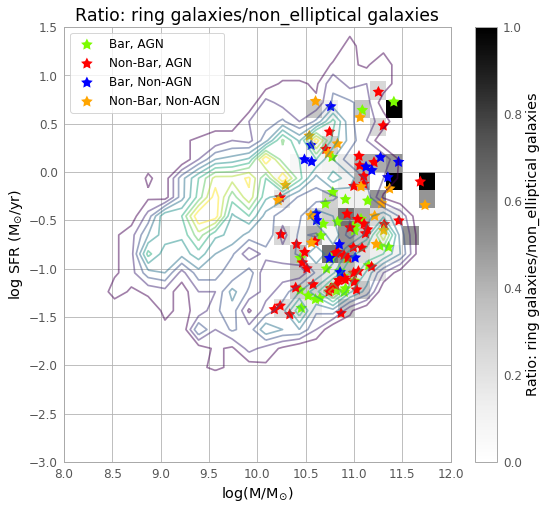

In [34]:
############ 把BAR LENGTH 画在各种SFR-mass图上 ##########
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(30,8))
plt.style.use(astropy_mpl_style)
############## 为GZ1建立mask，同时给GZ1的星系建立各个类别比如spiral的mask。non_elli_mask意思是非椭圆星系 ##############
ax1 = plt.subplot2grid((1,3), (0,0))

plt.contour(H_nelli_SFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
plt.imshow(H_ring_SFR/H_nelli_SFR,interpolation='nearest', origin='low', cmap='Greys', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: ring galaxies/non_elliptical galaxies')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)], 
            label='Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)], 
            label='Non-Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='red', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            label='Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='blue', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            label='Non-Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='orange', edgecolors='none')

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('Ratio: ring galaxies/non_elliptical galaxies')
plt.legend(loc='upper left')
plt.grid('on')

plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


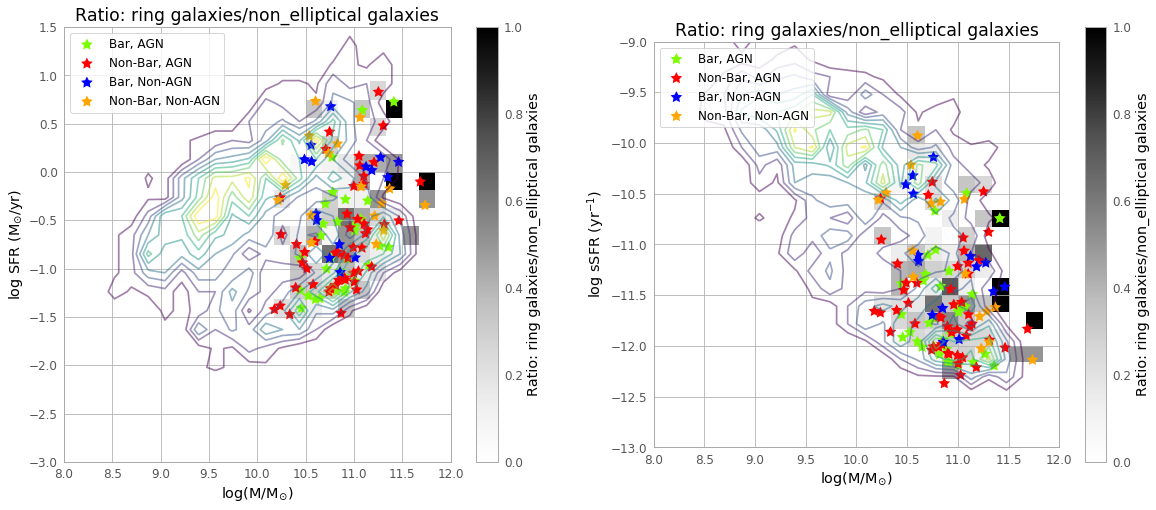

In [35]:
############ 把BAR LENGTH 画在各种SFR-mass图上 ##########
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

fig=plt.figure(figsize=(20,8))
plt.style.use(astropy_mpl_style)


############## 为GZ1建立mask，同时给GZ1的星系建立各个类别比如spiral的mask。non_elli_mask意思是非椭圆星系 ##############

ax1 = plt.subplot2grid((1,2), (0,0))

plt.contour(H_nelli_SFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
plt.imshow(H_ring_SFR/H_nelli_SFR,interpolation='nearest', origin='low', cmap='Greys', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: ring galaxies/non_elliptical galaxies')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)], 
            label='Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)], 
            label='Non-Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='red', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            label='Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='blue', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SFR[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            label='Non-Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='orange', edgecolors='none')

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('Ratio: ring galaxies/non_elliptical galaxies')
plt.legend(loc='upper left')
plt.grid('on')

ax2 = plt.subplot2grid((1,2), (0,1))

plt.contour(H_nelli_SSFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], label='Galaxies from sample')
plt.imshow(H_ring_SSFR/H_nelli_SSFR,interpolation='nearest', origin='low', cmap='Greys', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: ring galaxies/non_elliptical galaxies')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)],
            ring_log_SSFR[np.logical_and(np.logical_and(BARmask, AGN2+LINER),step3)], 
            label='Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='lawngreen', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)],
            ring_log_SSFR[np.logical_and(np.logical_and(~BARmask, AGN2+LINER),step3)], 
            label='Non-Bar, AGN', 
            s=150, marker=(5,1,0), facecolors='red', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SSFR[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            label='Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='blue', edgecolors='none')
plt.scatter(ring_log_mass[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)],
            ring_log_SSFR[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            label='Non-Bar, Non-AGN', 
            s=150, marker=(5,1,0), facecolors='orange', edgecolors='none')

plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('Ratio: ring galaxies/non_elliptical galaxies')
plt.legend(loc='upper left')
plt.grid('on')

plt.show()

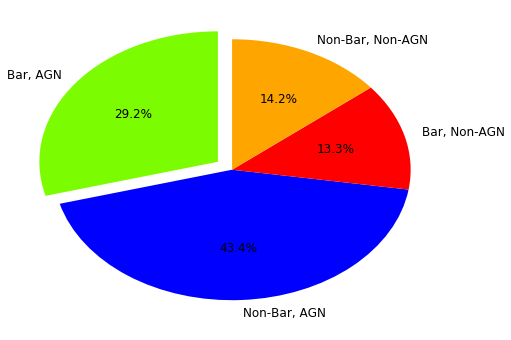

In [21]:
labels = 'Bar, AGN','Non-Bar, AGN','Bar, Non-AGN', 'Non-Bar, Non-AGN'
sizes = [sum(np.logical_and(BARmask, AGN2+LINER)[step3]),sum(np.logical_and(~BARmask, AGN2+LINER)[step3]),
         sum(np.logical_and(BARmask, ~(AGN2+LINER))[step3]),sum(np.logical_and(~BARmask, ~(AGN2+LINER))[step3])]
explode = (0.1, 0, 0, 0) #0.1表示将Hogs那一块凸显出来
colors='lawngreen', 'blue', 'red', 'orange'
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90, colors=colors)
plt.show()

## Bar Fraction
### 下面这个框改变了H_ring_SFR，注意如果需要用原来的H_ring_SFR，请回到最上面的几个cell。
### Bar fraction 的分母是满足step3条件的星系：step1 = np.logical_and(ring_fits[1].data['t01_smooth_or_features_a02_features_or_disk_debiased']>=0.430, ring_fits[1].data['t02_edgeon_a05_no_debiased']>=0.715)；step2 = ring_fits[1].data['t02_edgeon_a05_no_count']>=10；step3 = np.logical_and(step1,step2)
### 请不要：
也可以在之前的bins之后直接执行：
H_ring_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, bins=(bins_for_mass, bins_for_SFR))
H_ring_SFR = H_ring_SFR.T

H_ring_SSFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR-ring_log_mass, bins = (bins_for_mass, bins_for_SSFR))
H_ring_SSFR = H_ring_SSFR.T


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


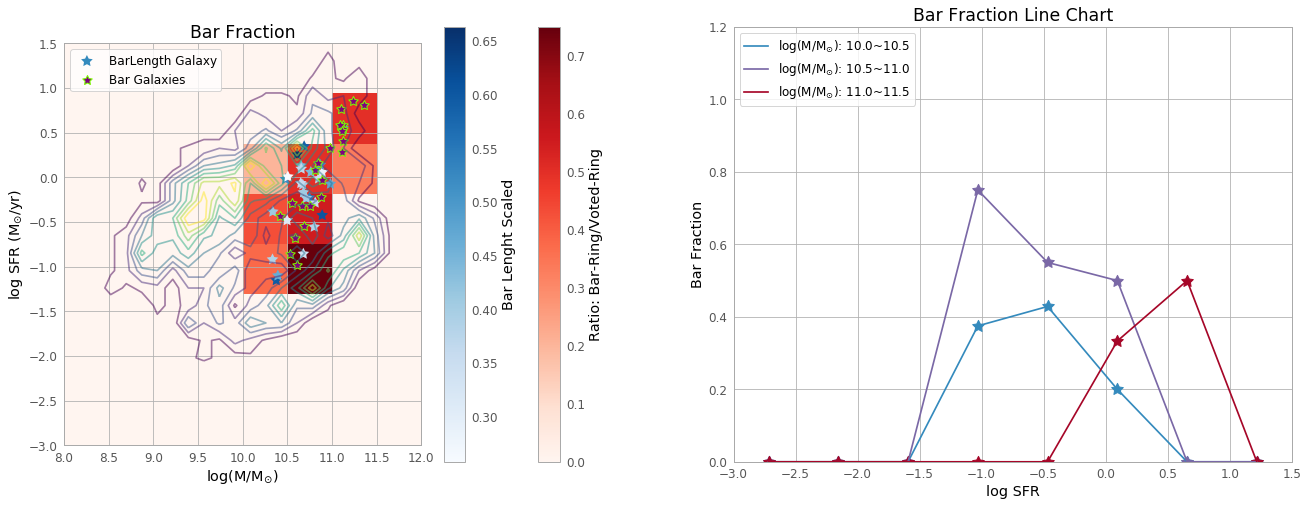

In [50]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_bar_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass[BARmask],ring_log_SFR[BARmask], 
                                                       bins=(bins_for_mass, bins_for_SFR))
H_ring_bar_SFR=H_ring_bar_SFR.T
H_ring_base_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass[step3], ring_log_SFR[step3], bins=(bins_for_mass, bins_for_SFR))
H_ring_base_SFR = H_ring_base_SFR.T
H_bar_fraction=H_ring_bar_SFR/H_ring_base_SFR
H_bar_fraction[np.isnan(H_bar_fraction)]=0

plt.imshow(H_bar_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: Bar-Ring/Voted-Ring')
#plt.scatter(ring_log_mass,ring_log_SFR,c='k')
plt.scatter(ring_log_mass[BARLENmask],ring_log_SFR[BARLENmask], c=bar_length_scaled[BARLENmask], label='BarLength Galaxy', 
            s=150, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label='Bar Lenght Scaled')
plt.scatter(ring_log_mass[np.logical_xor(BARLENmask,BARmask)], (ring_log_SFR)[np.logical_xor(BARLENmask,BARmask)], 
            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Galaxies')
plt.xlim(bins_for_mass[0],bins_for_mass[-1])
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('Bar Fraction')
plt.legend(loc='upper left')
plt.grid('on')

ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
    if sum(H_bar_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SFR[0], bins_for_SFR[-1])
plt.xlabel('log SFR')
plt.ylabel('Bar Fraction')
plt.legend(loc='upper left')
plt.title('Bar Fraction Line Chart')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


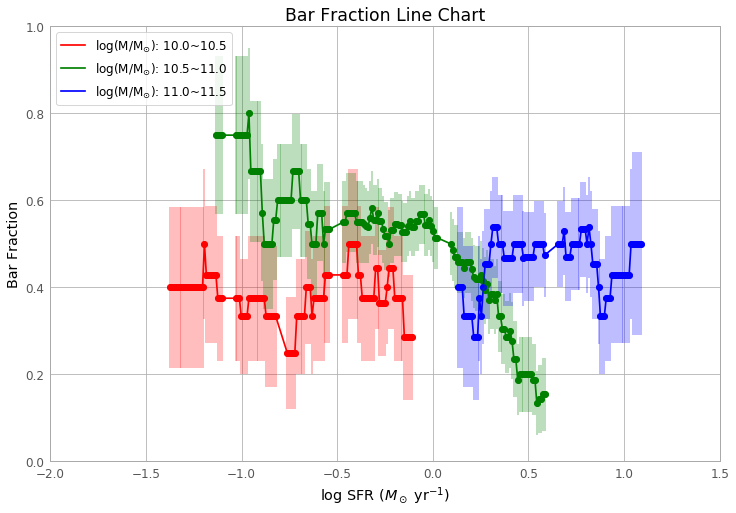

In [25]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8.3,12.3,step)


fig=plt.figure(figsize=(12,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
    
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13,-9,step)
        bins_for_mass=np.linspace(8,12,step)

        H_ring_bar_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass[BARmask],ring_log_SFR[BARmask], 
                                                       bins=(bins_for_mass, bins_for_SFR))
        H_ring_bar_SFR=H_ring_bar_SFR.T
        H_ring_base_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass[step3], ring_log_SFR[step3], 
                                                                  bins=(bins_for_mass, bins_for_SFR))
        H_ring_base_SFR = H_ring_base_SFR.T
        H_bar_fraction=H_ring_bar_SFR/H_ring_base_SFR
        H_bar_fraction[np.isnan(H_bar_fraction)]=0
        H_ring_bar_SFR[np.isnan(H_ring_bar_SFR)]=0

    
    
        SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
        #print(bins_for_SFR[:-1])
        if sum(H_bar_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SFR[:-1]+SFRshift
        y=H_bar_fraction[:,line]
        num=H_ring_bar_SFR[:,line]
        mask=(num>1)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        
        z=0.842
        N=H_ring_base_SFR[:,line]
        err=z*np.sqrt(H_bar_fraction[:,line]*(1- H_bar_fraction[:,line])/N)
        errset=np.append(errset,err[mask])
    #print(xset)   

    #plt.plot(xset,yset,'bo')
    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,1)
plt.xlim(-2,1.5)
plt.xlabel('log SFR ($M_\odot$ yr$^{-1}$)')
plt.ylabel('Bar Fraction')
plt.legend(loc='upper left')
plt.title('Bar Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


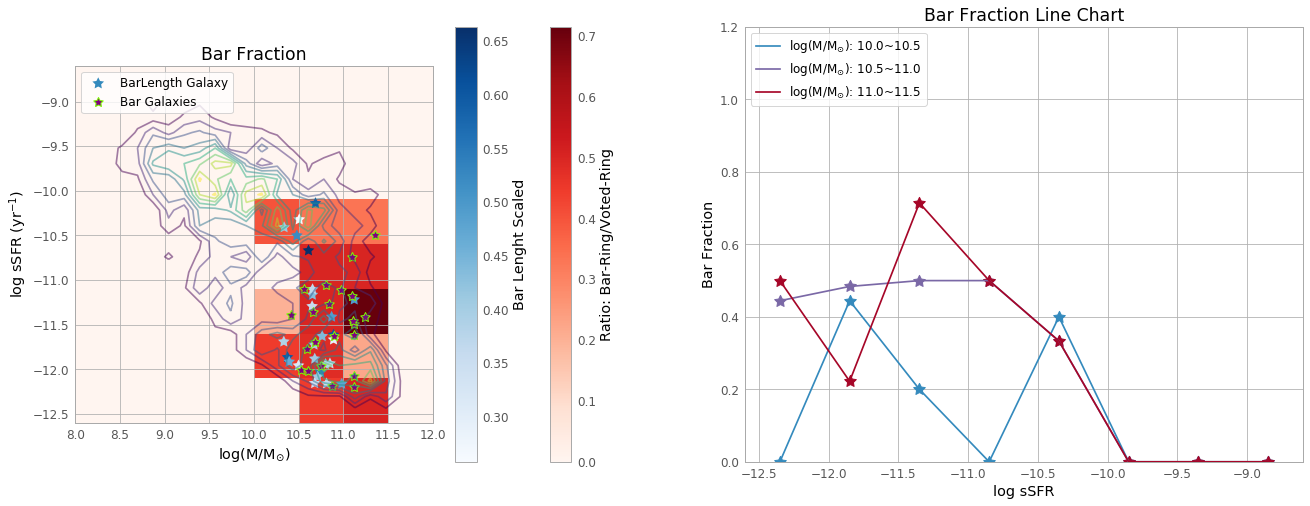

step=9 # 是imshow每边的格子数;
 bins_for_SFR=np.linspace(-3,1.5,step);
 bins_for_SSFR=np.linspace(-13+0.4,-9+0.4,step);
 bins_for_mass=np.linspace(8.2,12.2,step)


In [51]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)
ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SSFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13+0.4,-9+0.4,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_bar_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(ring_log_mass[BARmask],ring_log_SSFR[BARmask], 
                                                       bins=(bins_for_mass, bins_for_SSFR))
H_ring_bar_SSFR=H_ring_bar_SSFR.T
H_ring_base_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass[step3], ring_log_SSFR[step3], 
                                                                bins=(bins_for_mass, bins_for_SSFR))
H_ring_base_SSFR = H_ring_base_SSFR.T
H_bar_fraction=H_ring_bar_SSFR/H_ring_base_SSFR
H_bar_fraction[np.isnan(H_bar_fraction)]=0

plt.imshow(H_bar_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: Bar-Ring/Voted-Ring')
#plt.scatter(ring_log_mass,ring_log_SFR,c='k')
plt.scatter(ring_log_mass[BARLENmask],ring_log_SSFR[BARLENmask], c=bar_length_scaled[BARLENmask], label='BarLength Galaxy', 
            s=150, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label='Bar Lenght Scaled')
plt.scatter(ring_log_mass[np.logical_xor(BARLENmask,BARmask)], (ring_log_SSFR)[np.logical_xor(BARLENmask,BARmask)], 
            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Galaxies')
plt.xlim(bins_for_mass[0],bins_for_mass[-1])
plt.ylim(bins_for_SSFR[0], bins_for_SSFR[-1])
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('Bar Fraction')
plt.legend(loc='upper left')
plt.grid('on')

ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SSFRshift=(bins_for_SSFR[-1]-bins_for_SSFR[0])/(2*(len(bins_for_SSFR)-1))
    if sum(H_bar_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SSFR[:-1]+SSFRshift, H_bar_fraction[:,line],s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SSFR[:-1]+SSFRshift, H_bar_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SSFR[0], bins_for_SSFR[-1])
plt.xlabel('log sSFR')
plt.ylabel('Bar Fraction')
plt.legend(loc='upper left')
plt.title('Bar Fraction Line Chart')
plt.show()
print('step=9 # 是imshow每边的格子数;\n bins_for_SFR=np.linspace(-3,1.5,step);\n bins_for_SSFR=np.linspace(-13+0.4,-9+0.4,step);\n bins_for_mass=np.linspace(8.2,12.2,step)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


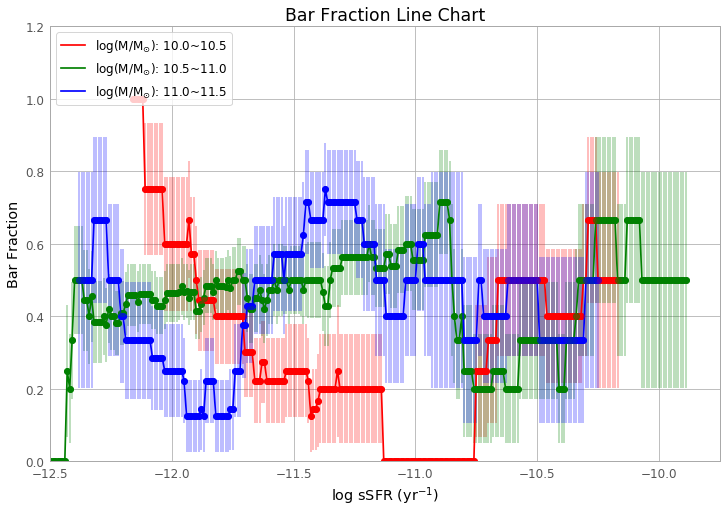

In [34]:
################ BAR RATIO #################

fig=plt.figure(figsize=(12,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
    
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13+forward,-9+forward,step)
        bins_for_mass=np.linspace(8,12,step)

        H_ring_bar_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(ring_log_mass[BARmask],ring_log_SSFR[BARmask], 
                                                       bins=(bins_for_mass, bins_for_SSFR))
        H_ring_bar_SSFR=H_ring_bar_SSFR.T
        H_ring_base_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass[step3], ring_log_SSFR[step3], 
                                                                  bins=(bins_for_mass, bins_for_SSFR))
        H_ring_base_SSFR = H_ring_base_SSFR.T
        H_bar_fraction=H_ring_bar_SSFR/H_ring_base_SSFR
        H_bar_fraction[np.isnan(H_bar_fraction)]=0
        H_ring_bar_SSFR[np.isnan(H_ring_bar_SSFR)]=0

    
    
        SSFRshift=(bins_for_SSFR[-1]-bins_for_SSFR[0])/(2*(len(bins_for_SSFR)-1))
        #print(bins_for_SFR[:-1])
        if sum(H_bar_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SSFR[:-1]+SSFRshift
        y=H_bar_fraction[:,line]
        num=H_ring_base_SSFR[:,line]
        mask=(num>1)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        
        z=0.842
        N=H_ring_base_SSFR[:,line]
        err=z*np.sqrt(H_bar_fraction[:,line]*(1- H_bar_fraction[:,line])/N)
        errset=np.append(errset,err[mask])
    #print(xset)   

    #plt.plot(xset,yset,'bo')
    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,1.2)
plt.xlim(-12.5,-9.75)
plt.xlabel('log sSFR (yr$^{-1}$)')
plt.ylabel('Bar Fraction')
plt.legend(loc='upper left')
plt.title('Bar Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

## AGN Fraction：从BPT diagram还是VO87? 各画一个吧！

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


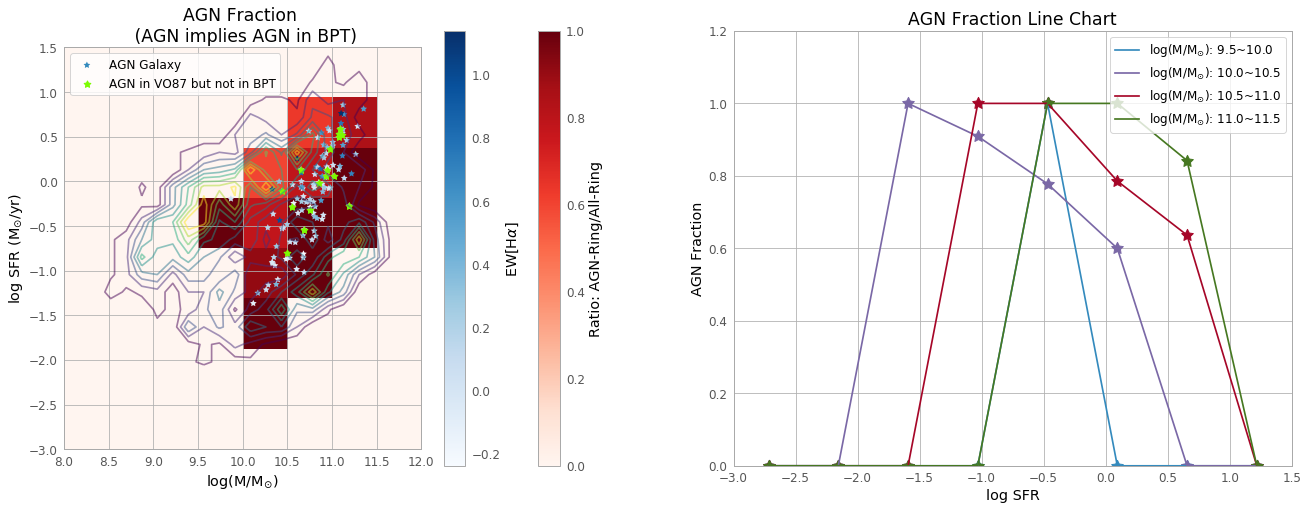

In [45]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_AGN_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass[AGN1],ring_log_SFR[AGN1], 
                                                       bins=(bins_for_mass, bins_for_SFR))
H_ring_AGN_SFR=H_ring_AGN_SFR.T
H_base_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, 
                                                                bins=(bins_for_mass, bins_for_SFR))
H_base_SFR = H_base_SFR.T
H_AGN_fraction=H_ring_AGN_SFR/H_base_SFR
H_AGN_fraction[np.isnan(H_AGN_fraction)]=0

plt.imshow(H_AGN_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: AGN-Ring/All-Ring')
plt.scatter(ring_log_mass[AGN1],ring_log_SFR[AGN1], c=(log_ew_ha)[AGN1], label='AGN Galaxy', 
            s=50, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label=r'EW[H$\alpha$]')
AGN3=np.logical_xor((AGN2+LINER),AGN1) ## AGN3是出现在VO87但是没出现在BPT里的AGN
plt.scatter(ring_log_mass[AGN3],ring_log_SFR[AGN3], color='lawngreen', s=50, marker=(5,1,0), label='AGN in VO87 but not in BPT')
plt.xlim(8,12)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('AGN Fraction \n (AGN implies AGN in BPT)')
plt.legend(loc='upper left')
plt.grid('on')



ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
    if sum(H_AGN_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SFR[:-1]+SFRshift, H_AGN_fraction[:,line],
                s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SFR[:-1]+SFRshift, H_AGN_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SFR[0], bins_for_SFR[-1])
plt.xlabel('log SFR')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper right')
plt.title('AGN Fraction Line Chart')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


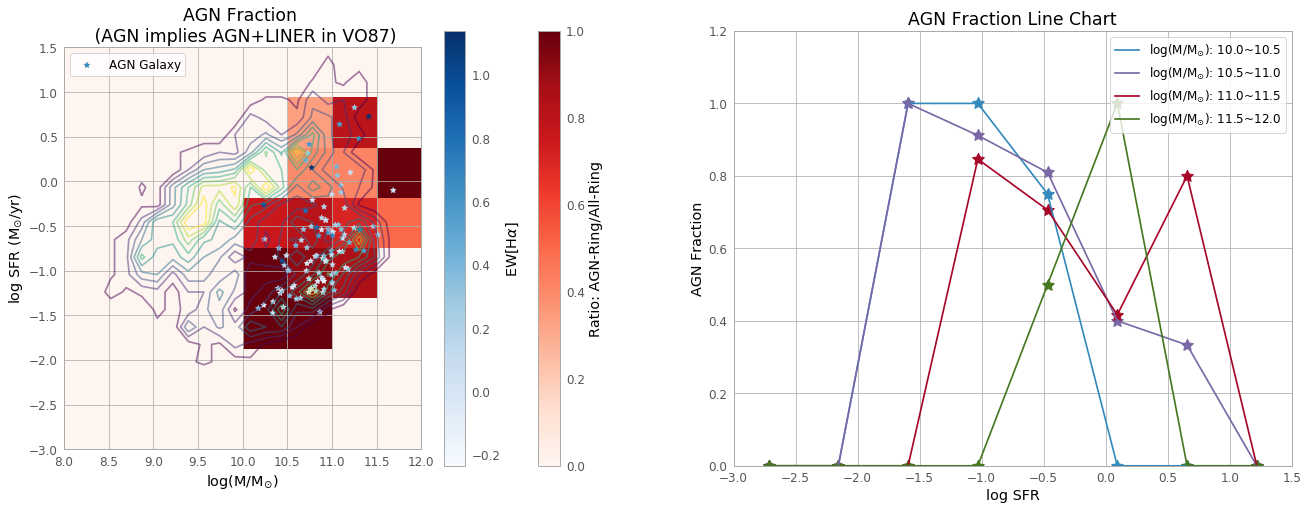

In [56]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_AGN_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass[AGN2+LINER],ring_log_SFR[AGN2+LINER], 
                                                       bins=(bins_for_mass, bins_for_SFR))
H_ring_AGN_SFR=H_ring_AGN_SFR.T
H_base_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, 
                                                                bins=(bins_for_mass, bins_for_SFR))
H_base_SFR = H_base_SFR.T
H_AGN_fraction=H_ring_AGN_SFR/H_base_SFR
H_AGN_fraction[np.isnan(H_AGN_fraction)]=0

plt.imshow(H_AGN_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: AGN-Ring/All-Ring')
plt.scatter(ring_log_mass[AGN2+LINER],ring_log_SFR[AGN2+LINER], c=(log_ew_ha)[AGN2+LINER], label='AGN Galaxy', 
            s=50, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label=r'EW[H$\alpha$]')
#AGN3=np.logical_xor((AGN2+LINER),AGN1) ## AGN3是出现在VO87但是没出现在BPT里的AGN
#plt.scatter(ring_log_mass[AGN3],ring_log_SFR[AGN3], color='lawngreen', s=50, marker=(5,1,0), label='AGN in VO87 but not in BPT')
plt.xlim(8,12)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('AGN Fraction \n (AGN implies AGN+LINER in VO87)')
plt.legend(loc='upper left')
plt.grid('on')



ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
    if sum(H_AGN_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SFR[:-1]+SFRshift, H_AGN_fraction[:,line],
                s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SFR[:-1]+SFRshift, H_AGN_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SFR[0], bins_for_SFR[-1])
plt.xlabel('log SFR')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper right')
plt.title('AGN Fraction Line Chart')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


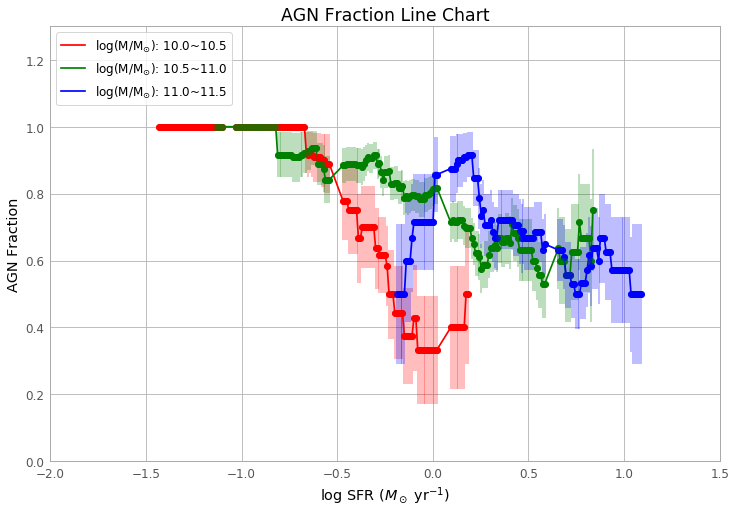

In [36]:
################ AGN RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8.3,12.3,step)


fig=plt.figure(figsize=(12,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
    
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13,-9,step)
        bins_for_mass=np.linspace(8,12,step)
        
        H_ring_AGN_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(ring_log_mass[AGN2+LINER],ring_log_SFR[AGN2+LINER], 
                                                       bins=(bins_for_mass, bins_for_SFR))
        H_ring_AGN_SFR=H_ring_AGN_SFR.T
        H_base_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, 
                                                                bins=(bins_for_mass, bins_for_SFR))
        H_base_SFR = H_base_SFR.T
        H_AGN_fraction=H_ring_AGN_SFR/H_base_SFR
        H_AGN_fraction[np.isnan(H_AGN_fraction)]=0
        H_base_SFR[np.isnan(H_base_SFR)]=0
        
        SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
        #print(bins_for_SFR[:-1])
        if sum(H_AGN_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SFR[:-1]+SFRshift
        y=H_AGN_fraction[:,line]
        num=H_base_SFR[:,line]
        mask=(num>3)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        z=0.842
        N=H_base_SFR[:,line]
        err=z*np.sqrt(y*(1- y)/N)
        errset=np.append(errset,err[mask])

    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,1.3)
plt.xlim(-2,1.5)
plt.xlabel('log SFR ($M_\odot$ yr$^{-1}$)')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper left')
plt.title('AGN Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


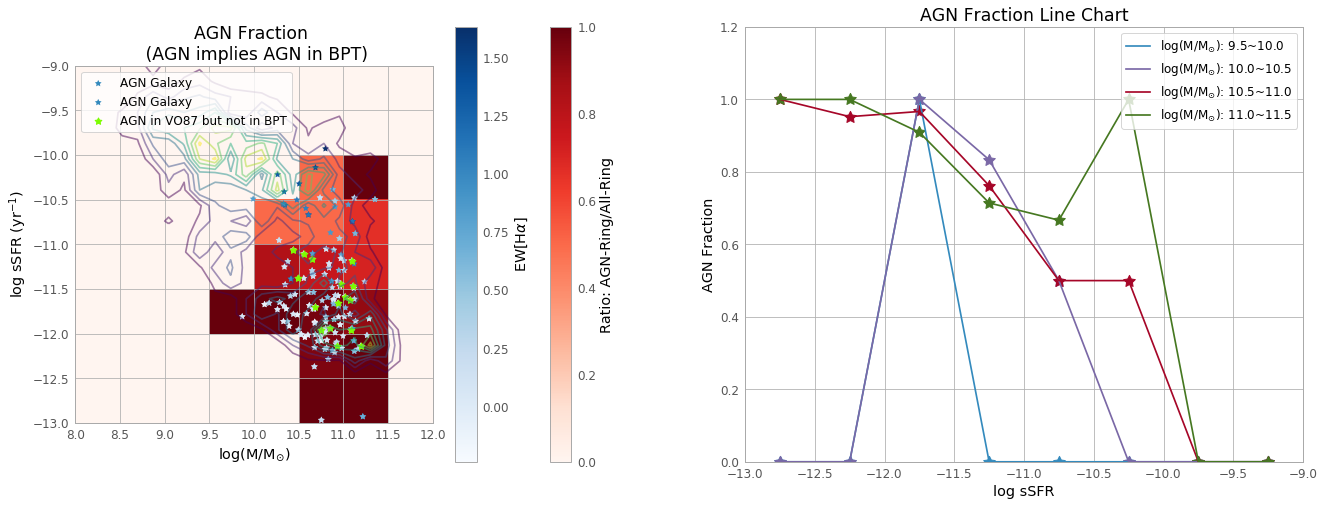

In [46]:
############### BPT 的 AGN fraction #################
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SSFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_AGN_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(ring_log_mass[AGN1],ring_log_SSFR[AGN1], 
                                                       bins=(bins_for_mass, bins_for_SSFR))
H_ring_AGN_SSFR=H_ring_AGN_SSFR.T
H_base_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass, ring_log_SSFR, 
                                                                bins=(bins_for_mass, bins_for_SSFR))
H_base_SSFR = H_base_SSFR.T
H_AGN_fraction=H_ring_AGN_SSFR/H_base_SSFR
H_AGN_fraction[np.isnan(H_AGN_fraction)]=0

plt.imshow(H_AGN_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: AGN-Ring/All-Ring')
plt.scatter(ring_log_mass[AGN1],ring_log_SSFR[AGN1], c=(log_ew_ha)[AGN1], label='AGN Galaxy', 
            s=50, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.scatter(ring_log_mass,ring_log_SSFR, c=(log_ew_ha), label='AGN Galaxy', 
            s=50, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label=r'EW[H$\alpha$]')
AGN3=np.logical_xor((AGN2+LINER),AGN1) ## AGN3是出现在VO87但是没出现在BPT里的AGN
plt.scatter(ring_log_mass[AGN3],ring_log_SSFR[AGN3], color='lawngreen', s=50, marker=(5,1,0), label='AGN in VO87 but not in BPT')
plt.xlim(8,12)
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('AGN Fraction \n (AGN implies AGN in BPT)')
plt.legend(loc='upper left')
plt.grid('on')


ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SFRshift=(bins_for_SSFR[-1]-bins_for_SSFR[0])/(2*(len(bins_for_SSFR)-1))
    if sum(H_AGN_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SSFR[:-1]+SSFRshift, H_AGN_fraction[:,line],
                s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SSFR[:-1]+SSFRshift, H_AGN_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SSFR[0], bins_for_SSFR[-1])
plt.xlabel('log sSFR')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper right')
plt.title('AGN Fraction Line Chart')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


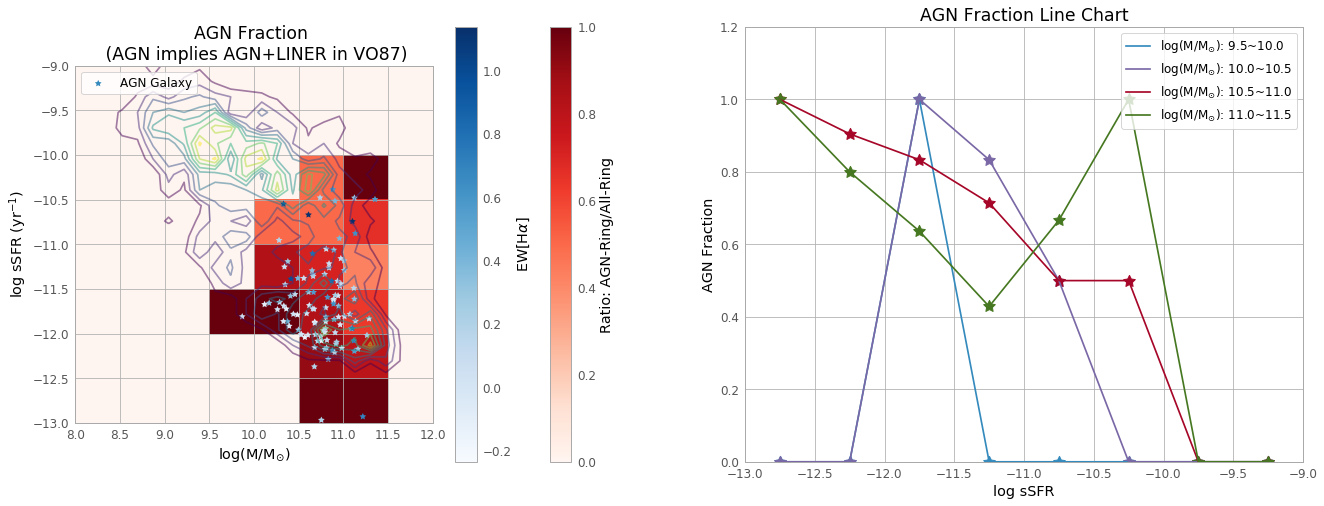

In [49]:
############### VO87 的 AGN fraction #################
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(22,8))
plt.style.use(astropy_mpl_style)

ax1 = plt.subplot2grid((1,2), (0,0))
plt.contour(H_nelli_SSFR,10,cmap='viridis', alpha=0.5,
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]])

step=9 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)

H_ring_AGN_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(ring_log_mass[AGN2+LINER],ring_log_SSFR[AGN2+LINER], 
                                                       bins=(bins_for_mass, bins_for_SSFR))
H_ring_AGN_SSFR=H_ring_AGN_SSFR.T
H_base_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass, ring_log_SSFR, 
                                                                bins=(bins_for_mass, bins_for_SSFR))
H_base_SSFR = H_base_SSFR.T
H_AGN_fraction=H_ring_AGN_SSFR/H_base_SSFR
H_AGN_fraction[np.isnan(H_AGN_fraction)]=0

plt.imshow(H_AGN_fraction, interpolation='nearest', origin='low', cmap='Reds', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: AGN-Ring/All-Ring')
plt.scatter(ring_log_mass[AGN2+LINER],ring_log_SSFR[AGN2+LINER], c=(log_ew_ha)[AGN2+LINER], label='AGN Galaxy', 
            s=50, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label=r'EW[H$\alpha$]')
#AGN3=np.logical_xor((AGN2+LINER),AGN1) ## AGN3是出现在VO87但是没出现在BPT里的AGN
#plt.scatter(ring_log_mass[AGN3],ring_log_SSFR[AGN3], color='lawngreen', s=50, marker=(5,1,0), label='AGN in VO87 but not in BPT')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.xlim(8,12)
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('AGN Fraction \n (AGN implies AGN+LINER in VO87)')
plt.legend(loc='upper left')
plt.grid('on')


ax2 = plt.subplot2grid((1,2), (0,1))
for i in range(0,len(bins_for_mass)-1):
    line=i
    SFRshift=(bins_for_SSFR[-1]-bins_for_SSFR[0])/(2*(len(bins_for_SSFR)-1))
    if sum(H_AGN_fraction[:,line]!=0)==0:
        continue
    plt.scatter(bins_for_SSFR[:-1]+SSFRshift, H_AGN_fraction[:,line],
                s=150, marker=(5,1,0))
    name='$\log$(M/M$_{\odot}$): '+str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
    plt.plot(bins_for_SSFR[:-1]+SSFRshift, H_AGN_fraction[:,line], label=name)
plt.ylim(0,1.2)
plt.xlim(bins_for_SSFR[0], bins_for_SSFR[-1])
plt.xlabel('log sSFR')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper right')
plt.title('AGN Fraction Line Chart')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


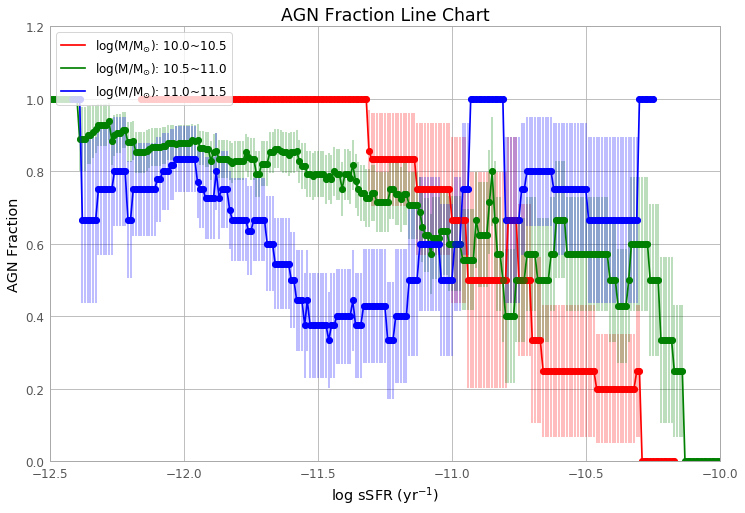

In [42]:
################ AGN RATIO #################
fig=plt.figure(figsize=(12,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
    
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13+forward,-9+forward,step)
        bins_for_mass=np.linspace(8,12,step)

        H_ring_AGN_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(ring_log_mass[AGN2+LINER],ring_log_SSFR[AGN2+LINER], 
                                                       bins=(bins_for_mass, bins_for_SSFR))
        H_ring_AGN_SSFR=H_ring_AGN_SSFR.T
        H_base_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass, ring_log_SSFR, 
                                                                bins=(bins_for_mass, bins_for_SSFR))
        H_base_SSFR = H_base_SSFR.T
        H_AGN_fraction=H_ring_AGN_SSFR/H_base_SSFR
        H_AGN_fraction[np.isnan(H_AGN_fraction)]=0
        H_base_SSFR[np.isnan(H_base_SSFR)]=0

    
    
        SSFRshift=(bins_for_SSFR[-1]-bins_for_SSFR[0])/(2*(len(bins_for_SSFR)-1))
        #print(bins_for_SFR[:-1])
        if sum(H_bar_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SSFR[:-1]+SSFRshift
        y=H_AGN_fraction[:,line]
        num=H_base_SSFR[:,line]
        mask=(num>1)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        z=0.842
        N=H_base_SSFR[:,line]
        err=z*np.sqrt(H_AGN_fraction[:,line]*(1- H_AGN_fraction[:,line])/N)
        errset=np.append(errset,err[mask])
    #print(xset)   

    #plt.plot(xset,yset,'bo')
    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,1.2)
plt.xlim(-12.5,-10)
plt.xlabel('log sSFR (yr$^{-1}$)')
plt.ylabel('AGN Fraction')
plt.legend(loc='upper left')
plt.title('AGN Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


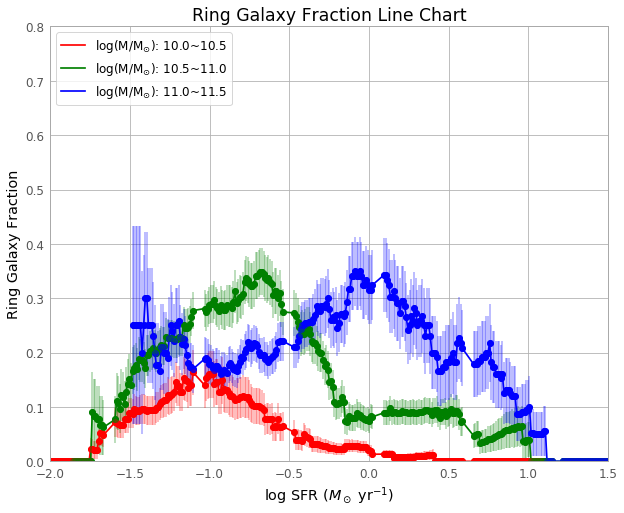

In [10]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(10,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13,-9,step)
        bins_for_mass=np.linspace(8,12,step)

        H_nelli_SFR, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[nelli_mask],tot_log_SFR[nelli_mask], 
                                                        bins=(bins_for_mass, bins_for_SFR))
        H_nelli_SFR=H_nelli_SFR.T

        #H_nelli_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass[nelli_mask],(tot_log_SFR-tot_log_mass)[nelli_mask], 
        #                                                  bins=(bins_for_mass, bins_for_SSFR))
        #H_nelli_SSFR=H_nelli_SSFR.T
        H_ring_SFR, bins_for_mass, bins_for_SFR = np.histogram2d(ring_log_mass, ring_log_SFR, bins=(bins_for_mass, bins_for_SFR))
        H_ring_SFR = H_ring_SFR.T
        
        H_ring_fraction=H_ring_SFR/H_nelli_SFR
        H_ring_fraction[np.isnan(H_ring_fraction)]=0
        H_nelli_SFR[np.isnan(H_nelli_SFR)]=0
        
    
        #SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
        SFRshift=(bins_for_SFR[1]-bins_for_SFR[0])/2
        #print(bins_for_SFR[:-1])
        if sum(H_ring_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SFR[:-1]+SFRshift
        y=H_ring_fraction[:,line]
        num=H_nelli_SFR[:,line]
        mask=(num>2)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        
        z=0.842
        N=H_nelli_SFR[:,line]
        err=z*np.sqrt(y*(1- y)/N)
        errset=np.append(errset,err[mask])
    #print(xset)   

    #plt.plot(xset,yset,'bo')
    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,0.8)
plt.xlim(-2,1.5)
plt.xlabel('log SFR ($M_\odot$ yr$^{-1}$)')
plt.ylabel('Ring Galaxy Fraction')
plt.legend(loc='upper left')
plt.title('Ring Galaxy Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


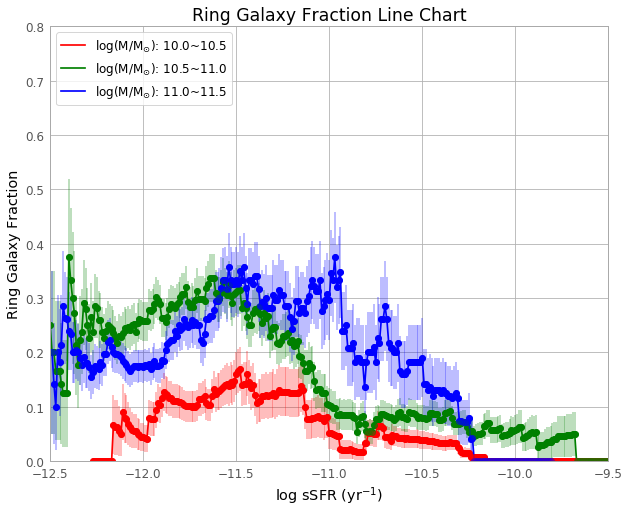

In [11]:
################ BAR RATIO #################
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)


fig=plt.figure(figsize=(10,8))
plt.style.use(astropy_mpl_style)
step=9 # 是imshow每边的格子数
colorss=[1,1,1,1,'r','g','b']
for i in range(4,7):#len(bins_for_mass)-1):
    line=i
    xset=[]
    np.array(xset)
    yset=[]
    np.array(yset)
    errset=[]
    np.array(errset)
    for j in range(0,50):
        forward=0.01*j
        bins_for_SFR=np.linspace(-3+forward, 1.5+forward,step)
        bins_for_SSFR=np.linspace(-13+forward,-9+forward,step)
        bins_for_mass=np.linspace(8,12,step)


        H_nelli_SSFR, bins_for_mass, bins_for_SSFR= np.histogram2d(tot_log_mass[nelli_mask],(tot_log_SFR-tot_log_mass)[nelli_mask], 
                                                          bins=(bins_for_mass, bins_for_SSFR))
        H_nelli_SSFR=H_nelli_SSFR.T
        H_ring_SSFR, bins_for_mass, bins_for_SSFR = np.histogram2d(ring_log_mass, ring_log_SSFR, bins=(bins_for_mass, bins_for_SSFR))
        H_ring_SSFR = H_ring_SSFR.T
        
        H_ring_fraction=H_ring_SSFR/H_nelli_SSFR
        H_ring_fraction[np.isnan(H_ring_fraction)]=0
        H_nelli_SSFR[np.isnan(H_nelli_SSFR)]=0
        
    
        #SFRshift=(bins_for_SFR[-1]-bins_for_SFR[0])/(2*(len(bins_for_SFR)-1))
        SSFRshift=(bins_for_SSFR[1]-bins_for_SSFR[0])/2
        #print(bins_for_SFR[:-1])
        if sum(H_ring_fraction[:,line]!=0)==0:
            continue
        
        name='$\log$(M/M$_{\odot}$): '+ str(bins_for_mass[line])+'~'+str(bins_for_mass[line+1])
        x=bins_for_SSFR[:-1]+SSFRshift
        y=H_ring_fraction[:,line]
        num=H_nelli_SSFR[:,line]
        mask=(num>3)
        xset=np.append(xset,x[mask])
        yset=np.append(yset,y[mask])
        
        z=0.842
        N=H_nelli_SSFR[:,line]
        err=z*np.sqrt(y*(1- y)/N)
        errset=np.append(errset,err[mask])
    #print(xset)   

    #plt.plot(xset,yset,'bo')
    plt.errorbar(xset, yset, yerr=errset, fmt='o',alpha=0.3, color=colorss[i])
    plt.plot(xset,yset,'o', color=colorss[i])
    shuzu=[]
    for k in range(0,len(xset)):
        shuzu.append([xset[k],yset[k]])
        newx=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[0]
        newy=np.array(list(sorted(shuzu, key=lambda x:x[0]))).T[1]
    plt.plot(newx,newy, label=name, color=colorss[i])
    
plt.ylim(0,0.8)
plt.xlim(-12.5,-9.5)
plt.xlabel('log sSFR (yr$^{-1}$)')
plt.ylabel('Ring Galaxy Fraction')
plt.legend(loc='upper left')
plt.title('Ring Galaxy Fraction Line Chart')
plt.show()
# plt.errorbar(bins_for_SFR[:-1]+SFRshift, H_bar_fraction[:,line], yerr=err, fmt='o')

# Color Mass Diagram: ugriz

### 备注：可以仿照最开始那篇color的paper，画不同质量区间的GV histogram图

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in log10


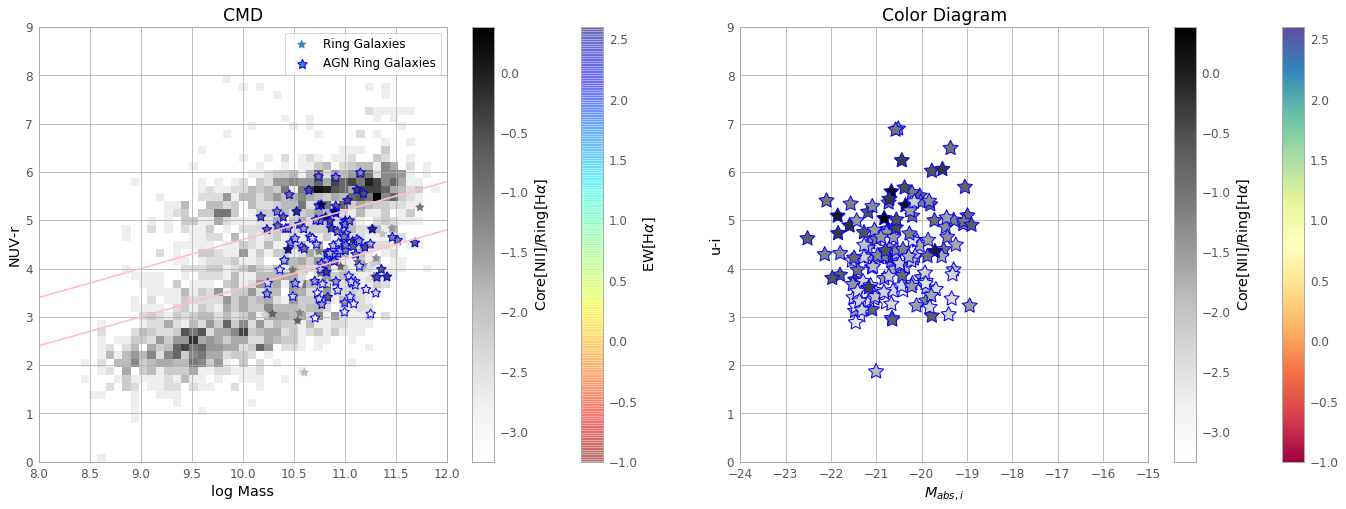

In [26]:
from matplotlib import colors
tot_NUV=all_fits[1].data['nsa_sersic_absmag'][:,1]
tot_u=all_fits[1].data['nsa_sersic_absmag'][:,2]
tot_r=all_fits[1].data['nsa_sersic_absmag'][:,4]
tot_i=all_fits[1].data['nsa_sersic_absmag'][:,5]
tot_ew_ha=all_fits[1].data['ew_ha_cen']
ring_NUV=ring_fits[1].data['nsa_sersic_absmag'][:,1]
ring_u=ring_fits[1].data['nsa_sersic_absmag'][:,2]
ring_i=ring_fits[1].data['nsa_sersic_absmag'][:,5]
ring_r=ring_fits[1].data['nsa_sersic_absmag'][:,4]
tot_log_mass=all_fits[1].data['MASS-MEDIAN']
ring_log_mass=ring_fits[1].data['MASS-MEDIAN']

ring_Lha=ring_fits[1].data['ring_Lha']
core_Lnii=ring_fits[1].data['core_Lnii']

step=50
bins_for_y=np.linspace(0,8,50)
bins_for_x=np.linspace(8,12,50)


fig=plt.figure(figsize=(24,8))
ax1 = plt.subplot2grid((1,2), (0,0))
norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_log_mass,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_log_mass, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

x=np.linspace(8,12,10)
y1=0.6*x-1.4
y2=0.6*x-2.4
plt.plot(x,y1,color='pink')
plt.plot(x,y2,color='pink')
plt.xlim(8,12)
plt.ylim(0,9)
plt.xlabel('log Mass')
plt.ylabel('NUV-r')
plt.scatter(ring_log_mass, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
RED=((ring_NUV-ring_r)>0.6*ring_log_mass-1.4)

BLUE=((ring_NUV-ring_r)<0.6*ring_log_mass-2.4)
GREEN=np.logical_and(((ring_NUV-ring_r)<0.6*ring_log_mass-1.4),((ring_NUV-ring_r)>0.6*ring_log_mass-2.4))
plt.scatter(ring_log_mass[AGN2+LINER], (ring_NUV-ring_r)[AGN2+LINER], s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha)[AGN2+LINER], 
            cmap='Greys', facecolors='none', edgecolors='blue',label='AGN Ring Galaxies')
plt.legend()
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')
plt.title('CMD')


ax2 = plt.subplot2grid((1,2), (0,1))
tot_u=all_fits[1].data['nsa_sersic_absmag'][:,0]
tot_i=all_fits[1].data['nsa_sersic_absmag'][:,3]
ring_u=ring_fits[1].data['nsa_sersic_absmag'][:,0]
ring_i=ring_fits[1].data['nsa_sersic_absmag'][:,3]

norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_i,tot_u-tot_i, c=np.log10(tot_ew_ha), cmap='Spectral', norm=norm, s=20)

plt.colorbar()
x=np.linspace(-25,-15,10)

plt.xlim(-24,-15)
plt.ylim(0,9)
plt.xlabel('$M_{abs,i}$')
plt.ylabel('u-i')
plt.scatter(ring_i, ring_u-ring_i, s=250, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), cmap='Greys', facecolors='none', edgecolors='b')
plt.colorbar(label=r'Core[NII]/Ring[H$\alpha$]')
plt.title('Color Diagram')

plt.subplots_adjust(wspace=0.1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


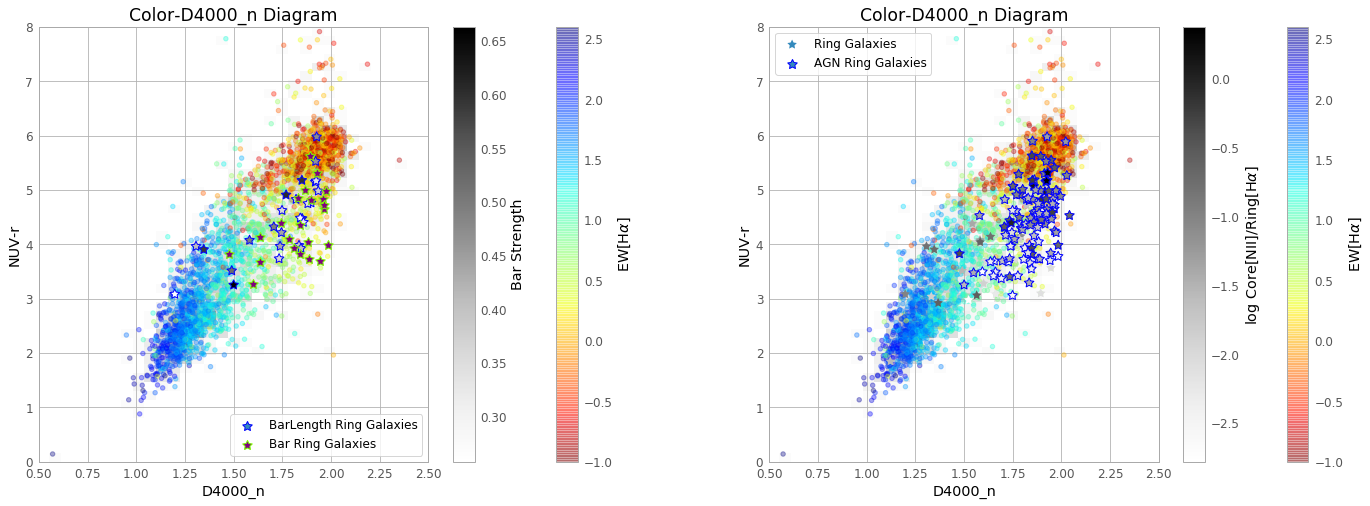

In [60]:
fig=plt.figure(figsize=(24,8))

ax1 = plt.subplot2grid((1,2), (0,0))
step=50
bins_for_y=np.linspace(0,8,step)
bins_for_x=np.linspace(0,3,step)
ring_D4000=ring_fits[1].data['D4000_N']
tot_D4000=all_fits[1].data['D4000_N']

norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000_n')
plt.ylabel('NUV-r')
#plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
#            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
plt.scatter(ring_D4000[BARLENmask], (ring_NUV-ring_r)[BARLENmask], s=100, marker=(5,1,0),c=bar_length_scaled[BARLENmask], 
            cmap='Greys', facecolors='none', edgecolors='blue',label='BarLength Ring Galaxies')
plt.colorbar(label=r'Bar Strength')
plt.scatter(ring_D4000[np.logical_xor(BARLENmask,BARmask)], (ring_NUV-ring_r)[np.logical_xor(BARLENmask,BARmask)], 
            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Ring Galaxies')
#plt.scatter(ring_D4000[AGN2+LINER], (ring_NUV-ring_r)[AGN2+LINER], s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha)[AGN2+LINER], 
#            cmap='Greys', facecolors='none', edgecolors='blue',label='AGN Ring Galaxies')
plt.legend()
#plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000_n Diagram')

ax2 = plt.subplot2grid((1,2), (0,1))
norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000_n')
plt.ylabel('NUV-r')
plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
#plt.scatter(ring_D4000[BARLENmask], (ring_NUV-ring_r)[BARLENmask], s=100, marker=(5,1,0),c=bar_length_scaled[BARLENmask], 
#            cmap='Greys', facecolors='none', edgecolors='blue',label='BarLength Ring Galaxies')
#plt.colorbar(label=r'Bar Strength')
#plt.scatter(ring_D4000[np.logical_xor(BARLENmask,BARmask)], (ring_NUV-ring_r)[np.logical_xor(BARLENmask,BARmask)], 
#            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Ring Galaxies')
plt.scatter(ring_D4000[AGN2+LINER], (ring_NUV-ring_r)[AGN2+LINER], s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha)[AGN2+LINER], 
            cmap='Greys', facecolors='none', edgecolors='blue',label='AGN Ring Galaxies')
plt.legend()
plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000_n Diagram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


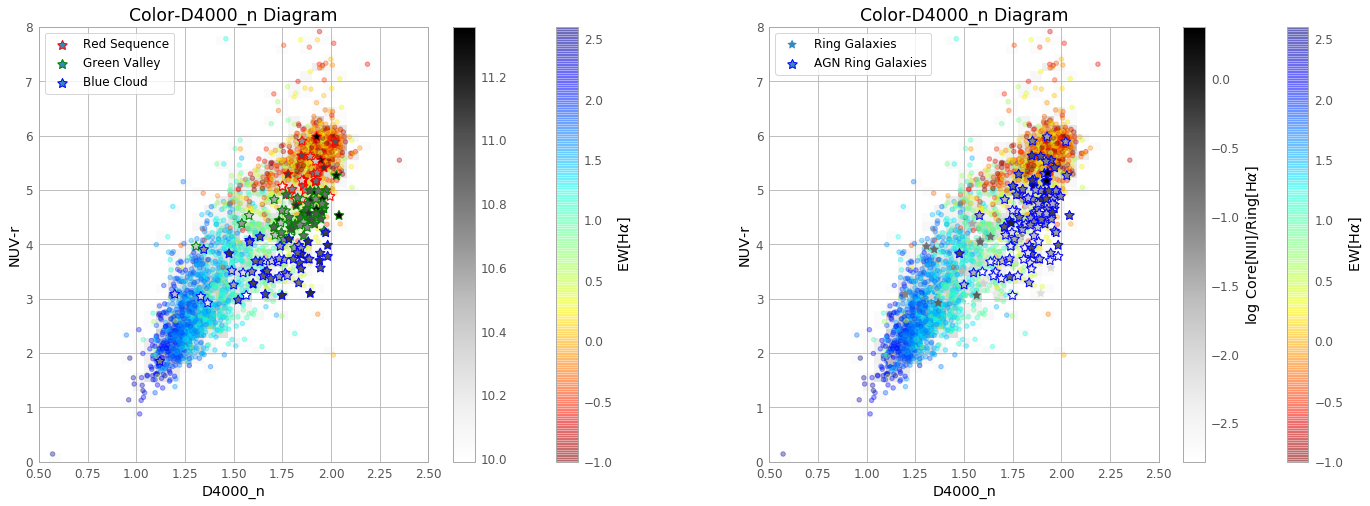

In [61]:
fig=plt.figure(figsize=(24,8))

ax1 = plt.subplot2grid((1,2), (0,0))
step=50
bins_for_y=np.linspace(0,8,step)
bins_for_x=np.linspace(0,3,step)
ring_D4000=ring_fits[1].data['D4000_N']
tot_D4000=all_fits[1].data['D4000_N']

norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000_n')
plt.ylabel('NUV-r')
#plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
#            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
plt.scatter(ring_D4000[RED], (ring_NUV-ring_r)[RED], s=100, marker=(5,1,0), c=ring_log_mass[RED], cmap='Greys',
            facecolors='none', edgecolors='red',label='Red Sequence')
plt.scatter(ring_D4000[GREEN], (ring_NUV-ring_r)[GREEN], s=100, marker=(5,1,0), c=ring_log_mass[GREEN], cmap='Greys',
            facecolors='none', edgecolors='green',label='Green Valley')
plt.scatter(ring_D4000[BLUE], (ring_NUV-ring_r)[BLUE], s=100, marker=(5,1,0), c=ring_log_mass[BLUE], cmap='Greys',
            facecolors='none', edgecolors='blue',label='Blue Cloud')
plt.colorbar()
plt.legend()
#plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000_n Diagram')

ax2 = plt.subplot2grid((1,2), (0,1))
norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000_n')
plt.ylabel('NUV-r')
plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
#plt.scatter(ring_D4000[BARLENmask], (ring_NUV-ring_r)[BARLENmask], s=100, marker=(5,1,0),c=bar_length_scaled[BARLENmask], 
#            cmap='Greys', facecolors='none', edgecolors='blue',label='BarLength Ring Galaxies')
#plt.colorbar(label=r'Bar Strength')
#plt.scatter(ring_D4000[np.logical_xor(BARLENmask,BARmask)], (ring_NUV-ring_r)[np.logical_xor(BARLENmask,BARmask)], 
#            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Ring Galaxies')
plt.scatter(ring_D4000[AGN2+LINER], (ring_NUV-ring_r)[AGN2+LINER], s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha)[AGN2+LINER], 
            cmap='Greys', facecolors='none', edgecolors='blue',label='AGN Ring Galaxies')
plt.legend()
plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000_n Diagram')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


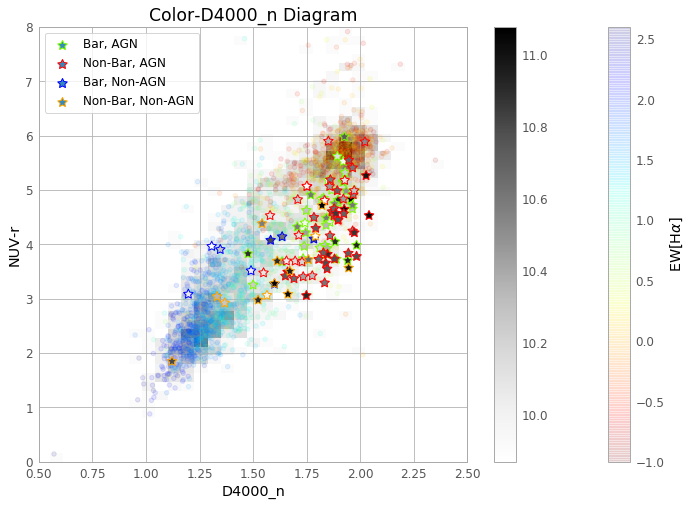

In [62]:
fig=plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((1,1), (0,0))
step=50
bins_for_y=np.linspace(0,8,step)
bins_for_x=np.linspace(0,3,step)
ring_D4000=ring_fits[1].data['D4000_N']
tot_D4000=all_fits[1].data['D4000_N']

norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.10)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000_n')
plt.ylabel('NUV-r')
#plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
#            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
plt.scatter(ring_D4000[np.logical_and(np.logical_and(BARmask, (AGN2+LINER)),step3)], 
            (ring_NUV-ring_r)[np.logical_and(np.logical_and(BARmask, (AGN2+LINER)),step3)], 
            s=100, marker=(5,1,0), c=ring_log_mass[np.logical_and(np.logical_and(BARmask, (AGN2+LINER)),step3)], 
            cmap='Greys', facecolors='none', edgecolors='lawngreen',label='Bar, AGN')
plt.scatter(ring_D4000[np.logical_and(np.logical_and(~BARmask, (AGN2+LINER)),step3)], 
            (ring_NUV-ring_r)[np.logical_and(np.logical_and(~BARmask, (AGN2+LINER)),step3)], 
            s=100, marker=(5,1,0), c=ring_log_mass[np.logical_and(np.logical_and(~BARmask, (AGN2+LINER)),step3)], 
            cmap='Greys', facecolors='none', edgecolors='red',label='Non-Bar, AGN')
plt.scatter(ring_D4000[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            (ring_NUV-ring_r)[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            s=100, marker=(5,1,0), c=ring_log_mass[np.logical_and(np.logical_and(BARmask, ~(AGN2+LINER)),step3)], 
            cmap='Greys', facecolors='none', edgecolors='blue',label='Bar, Non-AGN')
plt.scatter(ring_D4000[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            (ring_NUV-ring_r)[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            s=100, marker=(5,1,0), c=ring_log_mass[np.logical_and(np.logical_and(~BARmask, ~(AGN2+LINER)),step3)], 
            cmap='Greys', facecolors='none', edgecolors='orange',label='Non-Bar, Non-AGN')
plt.colorbar()
plt.legend()
#plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000_n Diagram')



plt.show()

# 单个MaNGA星系的BPT diagram
我现在想挑一个星系单独画它的BPT diagram，看看各个区域到底是怎么回事。当然我得挑一个完全face-on的。

redshift= 0.0338343
MaNGA ID= 1-94696


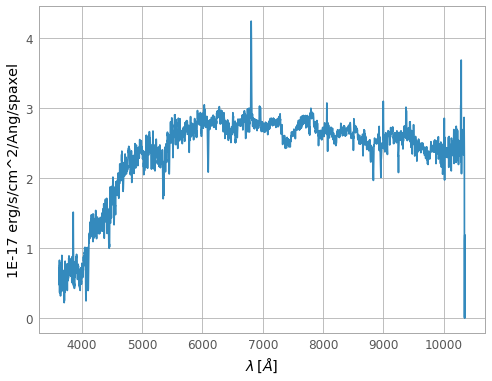

In [87]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
# 导入数据

cube = fits.open('manga-9026-12705-LOGCUBE.fits.gz')
drpall = fits.open('drpall-v2_1_2.fits')
tbdata=drpall[1].data
# 查红移和manga ID
flux_header=cube[1].header
ind=np.where(tbdata['mangaid']==flux_header['MANGAID'])
redshift=tbdata['nsa_z'][ind][0]
print('redshift=',redshift)
print('MaNGA ID=', flux_header['MANGAID'])

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

wave = cube['WAVE'].data
flux_header = cube['FLUX'].header

x_center = np.int(flux_header['CRPIX1']) - 1
y_center = np.int(flux_header['CRPIX2']) - 1
# 画光谱
plt.plot(wave, flux[x_center, y_center]) #flux是一个3维数组了吧，RA, DEC，intensity(对应到wave中的波长）。
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(flux_header['BUNIT'])
plt.show()

a string value was expected. [astropy.wcs.wcs]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


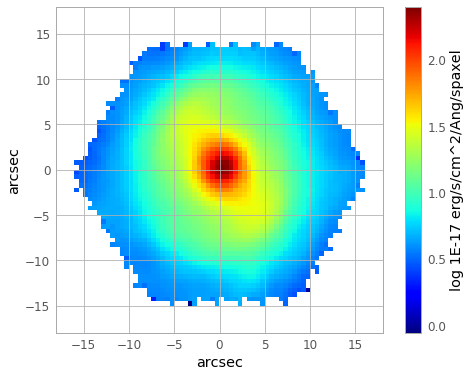

In [98]:
# 画imshow（Hα）
cubeWCS = wcs.WCS(flux_header)

ra = flux_header['OBJRA']
dec = flux_header['OBJDEC']
x_cube_coord, y_cube_coord, __ = cubeWCS.wcs_world2pix([[ra, dec, 1.]], 1)[0]
x_spaxel = np.int(np.round(x_cube_coord)) - 1
y_spaxel = np.int(np.round(y_cube_coord)) - 1

do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.0338343
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
plt.imshow(np.log10(im), extent=extent, cmap='jet',  origin='lower', interpolation='none') #vmin=0.1, vmax=100,
plt.colorbar(label='log '+flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


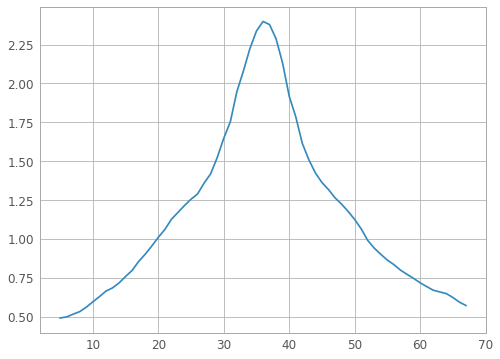

In [100]:
plt.plot(np.log10(im[36]))
plt.show()

In [101]:
baby=fits.open('manga-9026-12705.Pipe3D.cube.fits.gz')
cube = fits.open('manga-9026-12705-LOGCUBE.fits.gz')
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))
do_not_use = (mask & 2**10) != 0
BPTmask=do_not_use[:,:,2000]

nii=baby[3].data[46]
ha=baby[3].data[45]
oiii=baby[3].data[26]
hb=baby[3].data[28]
sii=baby[3].data[49]+baby[3].data[50]
e_nii=baby[3].data[46+228]
e_ha=baby[3].data[45+228]
e_oiii=baby[3].data[26+228]
e_hb=baby[3].data[28+228]
e_sii=baby[3].data[49+228]
SN_nii=nii/e_nii
SN_ha=ha/e_ha
SN_oiii=oiii/e_oiii
SN_sii=sii/e_sii
SN_hb=hb/e_hb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid v

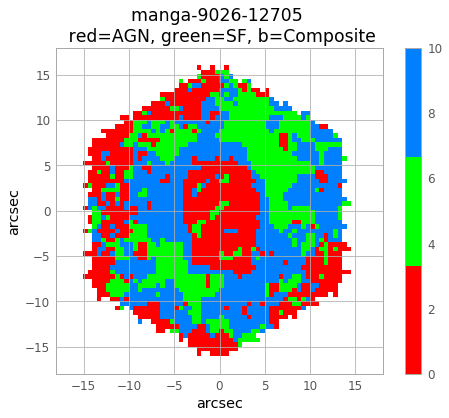

In [104]:
############### 判断星系的类型，从两个图中分别判断 ###############
y=np.log10(oiii/hb)
x=np.log10(nii/ha)
b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii>b,SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

#SF1=np.logical_and(np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
SF1=np.logical_and(y<0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#Composite=np.logical_and(np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19),SNmask)
Composite=np.logical_and(y>0.61/(x-0.05)+1.30, y<0.61/(x-0.47)+1.19)
#AGN1=np.logical_xor(np.logical_xor(SNmask,SF1),Composite)
AGN1=np.logical_xor(np.logical_xor(~BPTmask,SF1),Composite)

norm=colors.Normalize(vmin=0,vmax=10)
BPT=AGN1*2+SF1*4+Composite*(7)
myBPT=np.ma.array(BPT, mask=BPTmask)

color = [(1, 0, 0), (0, 1, 0), (0, 0.5, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = colors.LinearSegmentedColormap.from_list(cmap_name, color, N=3)

plt.imshow(myBPT, cmap=cm , norm=norm, extent=extent)
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title('manga-9026-12705 \n red=AGN, green=SF, b=Composite')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages

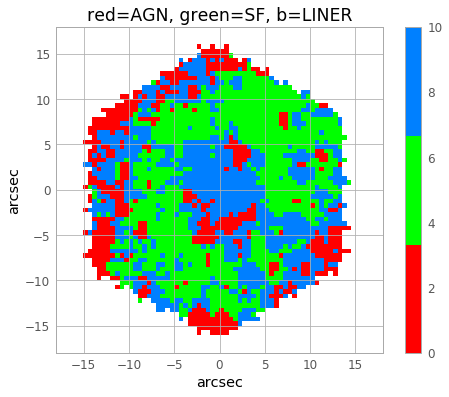

In [116]:
############### 判断星系的类型，从两个图中分别判断 ###############
y=np.log10(oiii/hb)
x=np.log10(sii/ha)
b=3/np.sqrt(2)
SNmask=np.logical_and(np.logical_and(np.logical_and(np.logical_and(SN_sii>b,SN_ha>b),SN_hb>b),SN_oiii>b),SN_nii>b)

#AGN1=np.logical_xor(np.logical_xor(SNmask,SF1),Composite)

#SF2=np.logical_and(np.logical_and(y<0.48/(x-0.10)+1.30,SNmask),x<0)
SF2=np.logical_and(y<0.48/(x-0.10)+1.30,x<0)
LINER=np.logical_xor(SF2,y<1.89*x+0.76)

AGN2=np.logical_xor(SF2,y>1.89*x+0.76)

norm=colors.Normalize(vmin=0,vmax=10)
BPT=AGN2*2+SF2*4+LINER*(7)
myBPT=np.ma.array(BPT, mask=BPTmask)

color = [(1, 0, 0), (0, 1, 0), (0, 0.5, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = colors.LinearSegmentedColormap.from_list(cmap_name, color, N=3)

plt.imshow(myBPT, cmap=cm , norm=norm, extent=extent)
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title(r'red=AGN, green=SF, b=LINER')
plt.show()

### 下面这个是对bar length分布的一个探索。看起来貌似在sSFR图中，较大bar length的星系分布在两个sequence上，较小bar length的星系分布在两个sequence之间。

In [46]:
bar_threshold = 0.5
step1 = np.logical_and(all_fits[1].data['t01_smooth_or_features_a02_features_or_disk_debiased']>=0.430, 
                     all_fits[1].data['t02_edgeon_a05_no_debiased']>0.715)
step2 = all_fits[1].data['t02_edgeon_a05_no_count']>10
step3 = np.logical_and(step1, step2)
step4 = np.logical_and(step3, all_fits[1].data['t03_bar_a06_bar_debiased'] > bar_threshold)
BARmask = step4
print("Bar-Ring Galaxy number is %d" % all_fits[1].data['t03_bar_a06_bar_debiased'][BARmask].shape[0])
BARLENmask=np.logical_and(BARmask,~np.isnan(all_fits[1].data['length_avg']))
bar_length_scaled=all_fits[1].data['length_scaled']

Bar-Ring Galaxy number is 212


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


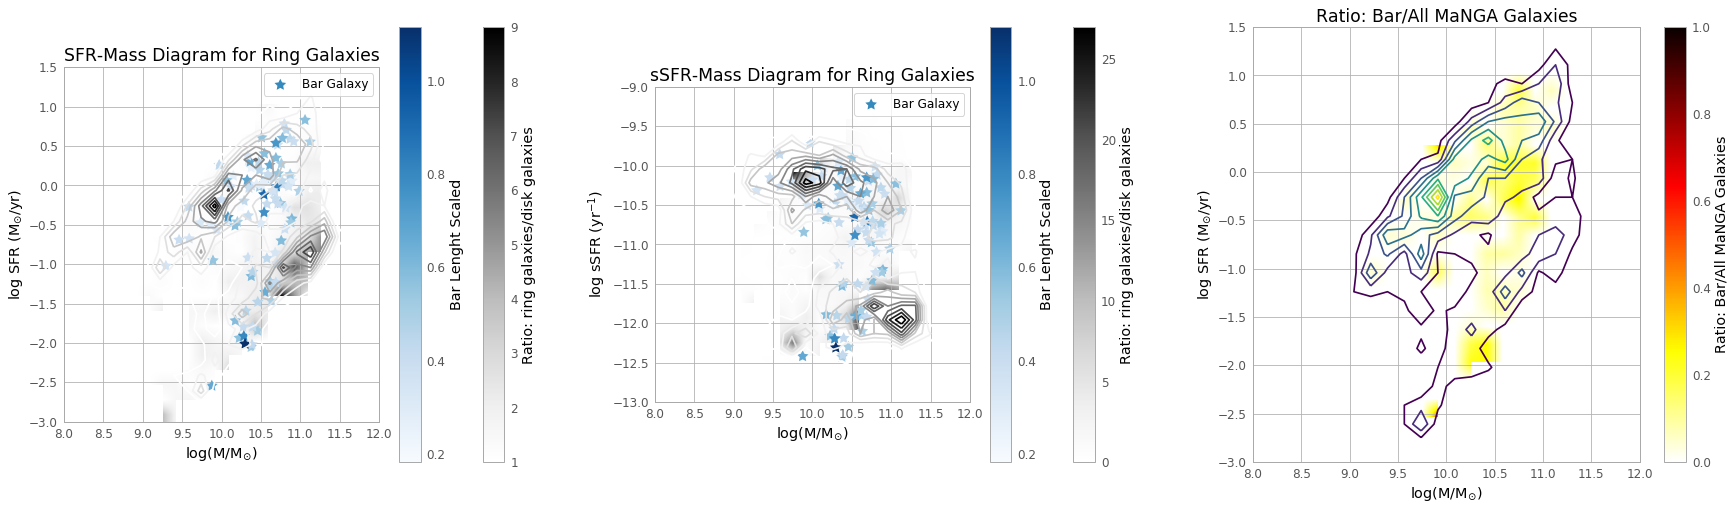

In [115]:
step=25 # 是imshow每边的格子数
bins_for_SFR=np.linspace(-3,1.5,step)
bins_for_SSFR=np.linspace(-13,-9,step)
bins_for_mass=np.linspace(8,12,step)
tot_log_SFR=all_fits[1].data['log_SFR_Ha']

fig=plt.figure(figsize=(30,8))
plt.style.use(astropy_mpl_style)
############## 为GZ1建立mask，同时给GZ1的星系建立各个类别比如spiral的mask。non_elli_mask意思是非椭圆星系 ##############
GZ1mask=~np.isnan(all_fits[1].data['SPIRAL']) ## GZ1mask为true的位置是有GZ1
disk_mask=(all_fits[1].data['SPIRAL'][GZ1mask]==1)
elliptical_mask=(all_fits[1].data['ELLIPTICAL'][GZ1mask]==1)
non_elli_mask=(all_fits[1].data['ELLIPTICAL'][GZ1mask]!=1)
uncertain_mask=(all_fits[1].data['UNCERTAIN'][GZ1mask]==1) 
H_disk, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[GZ1mask][non_elli_mask],
                                                    tot_log_SFR[GZ1mask][non_elli_mask], bins=(bins_for_mass, bins_for_SFR))
#H_disk, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[GZ1mask][disk_mask],tot_log_SFR[GZ1mask][disk_mask], bins=(bins_for_mass, bins_for_SFR))
H_disk=H_disk.T
ax1 = plt.subplot2grid((1,3), (0,0))
H_ratio_disk=H/H_disk
plt.contour(H,10,cmap='Greys',extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
plt.imshow(H_ratio_disk,interpolation='bilinear', origin='low', cmap='Greys', extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: ring galaxies/disk galaxies')
plt.scatter(tot_log_mass[BARLENmask], tot_log_SFR[BARLENmask], c=bar_length_scaled[BARLENmask], label='Bar Galaxy', 
            s=150, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label='Bar Lenght Scaled')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('SFR-Mass Diagram for Ring Galaxies')
plt.ylim(-3,1.5)
plt.legend()
plt.grid('on')

ax2 = plt.subplot2grid((1,3), (0,1))
H_ratio_disk=H_SSFR/H_disk
plt.contour(H_SSFR,10,cmap='Greys',
            extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SSFR[0], bins_for_SSFR[-1]], label='Galaxies from sample')
plt.imshow(H_ratio_disk,interpolation='bilinear', origin='low', cmap='Greys', 
           extent=[bins_for_mass[0],bins_for_mass[-1],bins_for_SSFR[0], bins_for_SSFR[-1]])
plt.colorbar(label='Ratio: ring galaxies/disk galaxies')
plt.scatter(tot_log_mass[BARLENmask],(tot_log_SFR-tot_log_mass)[BARLENmask], c=bar_length_scaled[BARLENmask], label='Bar Galaxy', 
            s=150, marker=(5,1,0), cmap='Blues', facecolors='none', edgecolors='none')
plt.colorbar(label='Bar Lenght Scaled')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ sSFR (yr$^{-1}$)')
plt.title('sSFR-Mass Diagram for Ring Galaxies')
plt.legend()
plt.ylim(-13,-9)
plt.grid('on')

ax3 = plt.subplot2grid((1,3), (0,2))
H_tot_bar, bins_for_mass, bins_for_SFR= np.histogram2d(tot_log_mass[BARLENmask],tot_log_SFR[BARLENmask], 
                                                       bins=(bins_for_mass, bins_for_SFR))
H_tot_bar=H_tot_bar.T


H_ratio=H_tot_bar/H
plt.contour(H_disk,10,cmap='viridis',extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]], label='Galaxies from sample')
#plt.imshow(H_disk, interpolation='bilinear',origin='low', cmap='viridis', extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
norm=colors.Normalize(vmin=0, vmax=1)
plt.imshow(H_ratio, interpolation='bilinear',origin='low', cmap='hot_r', norm=norm, extent=[bins_for_mass[0],bins_for_mass[-1], bins_for_SFR[0], bins_for_SFR[-1]])
plt.colorbar(label='Ratio: Bar/All MaNGA Galaxies')
plt.xlabel('$\log$(M/M$_{\odot}$)')
plt.ylabel('$\log$ SFR (M$_{\odot}$/yr)')
plt.title('Ratio: Bar/All MaNGA Galaxies')
plt.grid('on')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


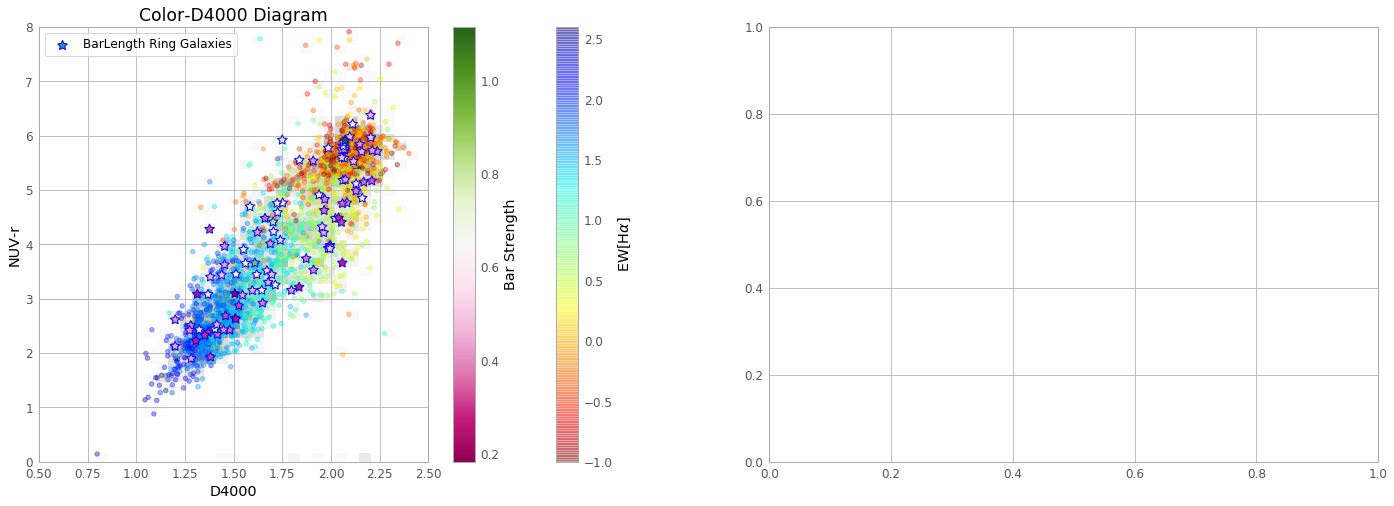

In [49]:
fig=plt.figure(figsize=(24,8))

ax1 = plt.subplot2grid((1,2), (0,0))
step=50
bins_for_y=np.linspace(0,8,step)
bins_for_x=np.linspace(0,3,step)
ring_D4000=ring_fits[1].data['D4000']
tot_D4000=all_fits[1].data['D4000']

norm=colors.Normalize(vmin=-1,vmax=2.6)
plt.scatter(tot_D4000,tot_NUV-tot_r, c=np.log10(tot_ew_ha), cmap='jet_r', norm=norm, s=20, alpha=0.35)
plt.legend()
plt.colorbar(label=r'EW[H$\alpha$]')
plt.ylim(0,8)
plt.xlim(0.5,2.5)

hist_CMD, bins_for_x, bins_for_y= np.histogram2d(tot_D4000, tot_NUV-tot_r, bins=(bins_for_x, bins_for_y))
hist_CMD=hist_CMD.T
plt.imshow(hist_CMD, interpolation='nearest',origin='low', cmap='binary', 
           extent=[bins_for_x[0],bins_for_x[-1], bins_for_y[0], bins_for_y[-1]],aspect='auto')

plt.xlabel('D4000')
plt.ylabel('NUV-r')
#plt.scatter(ring_D4000, ring_NUV-ring_r, s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha), 
#            cmap='Greys', facecolors='none', edgecolors='none',label='Ring Galaxies')
plt.scatter(tot_D4000[BARLENmask], (tot_NUV-tot_r)[BARLENmask], s=100, marker=(5,1,0),c=bar_length_scaled[BARLENmask], 
            cmap='PiYG', facecolors='none', edgecolors='blue',label='BarLength Ring Galaxies')
plt.colorbar(label=r'Bar Strength')
#plt.scatter(tot_D4000[np.logical_xor(BARLENmask,BARmask)], (tot_NUV-tot_r)[np.logical_xor(BARLENmask,BARmask)], 
#            s=100, marker=(5,1,0), facecolors='purple', edgecolors='lawngreen',label='Bar Ring Galaxies')
#plt.scatter(ring_D4000[AGN2+LINER], (ring_NUV-ring_r)[AGN2+LINER], s=100, marker=(5,1,0),c=np.log(core_Lnii/ring_Lha)[AGN2+LINER], 
#            cmap='Greys', facecolors='none', edgecolors='blue',label='AGN Ring Galaxies')
plt.legend()
#plt.colorbar(label=r'log Core[NII]/Ring[H$\alpha$]')
plt.title('Color-D4000 Diagram')

ax2 = plt.subplot2grid((1,2), (0,1))

plt.show()